In [1]:
# packages import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

# plot setting
%matplotlib inline

In [2]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

## 1. Data Processing

### Head, Shape and Information

In [3]:
train.head()

,Train_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,60,RL,88.0,12128,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Abnorml,209000
1,2,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
2,3,50,RL,120.0,17360,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,172500
3,4,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,232000
4,5,80,RL,88.0,15312,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,COD,Normal,148000


In [4]:
train.shape

(1570, 81)

In [5]:
test.head()

,Test_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,5,2009,WD,Normal
1,2,20,RL,80.0,10928,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
2,3,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
3,4,20,RL,60.0,8428,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
4,5,50,RM,50.0,9140,Pave,NaN,Reg,HLS,AllPub,...,200,0,NaN,MnPrv,NaN,0,4,2010,COD,Normal


In [6]:
test.shape

(1210, 80)

In [7]:
#na_values = ["", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "N/A", "NA", "NULL", "NaN","n/a", "nan", "null"]
na_values = ["", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "N/A", "NULL", "NaN","n/a", "nan", "null"]

train_new = pd.read_csv('train.csv', keep_default_na = False, na_values = na_values)
test_new = pd.read_csv('test.csv', keep_default_na = False, na_values = na_values)

In [8]:
train_new.head()

,Train_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,60,RL,88.0,12128,Pave,NA,IR1,Bnk,AllPub,...,0,NA,MnPrv,NA,0,11,2006,WD,Abnorml,209000
1,2,120,RL,48.0,6240,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,12,2009,WD,Normal,254000
2,3,50,RL,120.0,17360,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2010,WD,Normal,172500
3,4,20,RL,73.0,8688,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,232000
4,5,80,RL,88.0,15312,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2009,COD,Normal,148000


In [9]:
train_new.shape

(1570, 81)

In [10]:
test_new.head()

,Test_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,80,RL,120.0,19296,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,GdWo,NA,0,5,2009,WD,Normal
1,2,20,RL,80.0,10928,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,8,2009,WD,Normal
2,3,160,RL,24.0,2280,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
3,4,20,RL,60.0,8428,Pave,NA,IR2,Lvl,AllPub,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
4,5,50,RM,50.0,9140,Pave,NA,Reg,HLS,AllPub,...,200,0,NA,MnPrv,NA,0,4,2010,COD,Normal


In [11]:
test_new.shape

(1210, 80)

In [12]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 81 columns):
Train_ID           1570 non-null int64
MS SubClass        1570 non-null int64
MS Zoning          1570 non-null object
Lot Frontage       1306 non-null float64
Lot Area           1570 non-null int64
Street             1570 non-null object
Alley              1570 non-null object
Lot Shape          1570 non-null object
Land Contour       1570 non-null object
Utilities          1570 non-null object
Lot Config         1570 non-null object
Land Slope         1570 non-null object
Neighborhood       1570 non-null object
Condition 1        1570 non-null object
Condition 2        1570 non-null object
Bldg Type          1570 non-null object
House Style        1570 non-null object
Overall Qual       1570 non-null int64
Overall Cond       1570 non-null int64
Year Built         1570 non-null int64
Year Remod/Add     1570 non-null int64
Roof Style         1570 non-null object
Roof Matl          

In [13]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 80 columns):
Test_ID            1210 non-null int64
MS SubClass        1210 non-null int64
MS Zoning          1210 non-null object
Lot Frontage       1004 non-null float64
Lot Area           1210 non-null int64
Street             1210 non-null object
Alley              1210 non-null object
Lot Shape          1210 non-null object
Land Contour       1210 non-null object
Utilities          1210 non-null object
Lot Config         1210 non-null object
Land Slope         1210 non-null object
Neighborhood       1210 non-null object
Condition 1        1210 non-null object
Condition 2        1210 non-null object
Bldg Type          1210 non-null object
House Style        1210 non-null object
Overall Qual       1210 non-null int64
Overall Cond       1210 non-null int64
Year Built         1210 non-null int64
Year Remod/Add     1210 non-null int64
Roof Style         1210 non-null object
Roof Matl          

In [14]:
# Colmun Consistency

In [15]:
train_columns = set(train_new.columns.tolist())
test_columns = set(test_new.columns.tolist())
full_columns = set(train_new.columns.tolist()+test_new.columns.tolist())

In [16]:
# specific column for test data
test_columns_specific = full_columns - train_columns
test_columns_specific

{'Test_ID'}

In [17]:
train_new = train_new.iloc[:, 1:]
train_new.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,60,RL,88.0,12128,Pave,NA,IR1,Bnk,AllPub,Inside,...,0,NA,MnPrv,NA,0,11,2006,WD,Abnorml,209000
1,120,RL,48.0,6240,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,12,2009,WD,Normal,254000
2,50,RL,120.0,17360,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,1,2010,WD,Normal,172500
3,20,RL,73.0,8688,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2006,WD,Normal,232000
4,80,RL,88.0,15312,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,3,2009,COD,Normal,148000


In [18]:
# specific column for train data
train_columns_specific = full_columns - test_columns
train_columns_specific

{'SalePrice', 'Train_ID'}

In [19]:
train_new.shape

(1570, 80)

In [20]:
test_new = test_new.iloc[:, 1:]
test_new.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,80,RL,120.0,19296,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,0,NA,GdWo,NA,0,5,2009,WD,Normal
1,20,RL,80.0,10928,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,8,2009,WD,Normal
2,160,RL,24.0,2280,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
3,20,RL,60.0,8428,Pave,NA,IR2,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
4,50,RM,50.0,9140,Pave,NA,Reg,HLS,AllPub,Inside,...,200,0,NA,MnPrv,NA,0,4,2010,COD,Normal


In [21]:
test_new.shape

(1210, 79)

### Handling Missing Data

In [22]:
# number of NaN for each column

In [23]:
train_new.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      264
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [24]:
test_new.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      206
Lot Area            0
Street              0
                 ... 
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
Length: 79, dtype: int64

In [25]:
# the columns that contain NaN

In [26]:
# the train columns that contain NaN
train_new.columns[train_new.isnull().any()]

Index(['Lot Frontage', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Finish'],
      dtype='object')

In [27]:
len(train_new.columns[train_new.isnull().any()])

16

In [28]:
# the test columns that contain NaN
test_new.columns[test_new.isnull().any()]

Index(['Lot Frontage', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Exposure',
       'BsmtFin Type 2', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond'],
      dtype='object')

In [29]:
len(test_new.columns[test_new.isnull().any()])

14

In [30]:
train_nan = set(train_new.columns[train_new.isnull().any()].tolist())
test_nan = set(test_new.columns[test_new.isnull().any()].tolist())
full_nan = set(train_new.columns[train_new.isnull().any()].tolist()+test_new.columns[test_new.isnull().any()].tolist())

In [31]:
# specific NaN columns in train data
train_nan_specific = full_nan - test_nan
train_nan_specific

{'Bsmt Cond',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'Total Bsmt SF'}

In [32]:
# specific NaN columns in test data
test_nan_specific = full_nan - train_nan
test_nan_specific

{'Electrical', 'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Qual'}

In [33]:
# common NaN columns in both train and test data
common_nan = full_nan - train_nan_specific - test_nan_specific
common_nan

{'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'BsmtFin Type 2',
 'Garage Finish',
 'Garage Yr Blt',
 'Lot Frontage',
 'Mas Vnr Area',
 'Mas Vnr Type'}

#### Handling of specific train NaN columns for train data

In [34]:
# Handling of specific NaN columns for train data

#{'Bsmt Cond', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'BsmtFin Type 1', 'Total Bsmt SF'}

# For numerical data, fill in missing data with mean
# For categorical data, fill in missing data with mode

In [35]:
train_new.loc[:, 'Bsmt Cond'].isnull().sum()

1

In [36]:
train_new[train_new.loc[:, 'Bsmt Cond'].isnull()].index

Int64Index([508], dtype='int64')

In [37]:
train_new['Bsmt Cond'].value_counts()

TA    1417
Gd      60
Fa      47
NA      41
Po       2
Ex       2
Name: Bsmt Cond, dtype: int64

In [38]:
train_new['Bsmt Unf SF'].isnull().sum()

1

In [39]:
train_new[train_new.loc[:, 'Bsmt Unf SF'].isnull()].index

Int64Index([508], dtype='int64')

In [40]:
train_new[train_new.loc[:, 'BsmtFin SF 1'].isnull()].index

Int64Index([508], dtype='int64')

In [41]:
train_new[train_new.loc[:, 'BsmtFin SF 2'].isnull()].index

Int64Index([508], dtype='int64')

In [42]:
train_new[train_new.loc[:, 'Total Bsmt SF'].isnull()].index

Int64Index([508], dtype='int64')

In [43]:
train_new[train_new.loc[:, 'BsmtFin Type 1'].isnull()].index

Int64Index([508], dtype='int64')

In [44]:
#Fill in missing data with mean
train_new['Bsmt Unf SF'].fillna(train_new['Bsmt Unf SF'].mean(),inplace=True)
train_new['BsmtFin SF 1'].fillna(train_new['BsmtFin SF 1'].mean(),inplace=True)
train_new['BsmtFin SF 2'].fillna(train_new['BsmtFin SF 2'].mean(),inplace=True)
train_new['Total Bsmt SF'].fillna(train_new['Total Bsmt SF'].mean(),inplace=True)

In [45]:
#Fill in missing data with mode
train_new['Bsmt Cond'].fillna(train_new['Bsmt Cond'].mode()[0],inplace=True)
train_new['Bsmt Qual'].fillna(train_new['Bsmt Qual'].mode()[0],inplace=True)
train_new['BsmtFin Type 1'].fillna(train_new['BsmtFin Type 1'].mode()[0],inplace=True)

#### Handling of specific NaN columns for test data

In [46]:
# Handling of specific NaN columns for test data

#{'Electrical', 'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Qual'}

# For numerical data, fill in missing data with mean
# For categorical data, fill in missing data with mode

In [47]:
test_new['Electrical'].isnull().sum()

1

In [48]:
test_new[test_new.loc[:, 'Electrical'].isnull()].index

Int64Index([463], dtype='int64')

In [49]:
test_new['Garage Area'].isnull().sum()

1

In [50]:
test_new[test_new.loc[:, 'Garage Area'].isnull()].index

Int64Index([941], dtype='int64')

In [51]:
test_new[test_new.loc[:, 'Garage Cars'].isnull()].index

Int64Index([941], dtype='int64')

In [52]:
test_new[test_new.loc[:, 'Garage Cond'].isnull()].index

Int64Index([941], dtype='int64')

In [53]:
test_new[test_new.loc[:, 'Garage Qual'].isnull()].index

Int64Index([941], dtype='int64')

In [54]:
#Fill in missing data with mean
test_new['Garage Area'].fillna(test_new['Garage Area'].mean(),inplace=True)
test_new['Garage Cars'].fillna(test_new['Garage Cars'].mean(),inplace=True)

In [55]:
#Fill in missing data with mode
test_new['Electrical'].fillna(test_new['Electrical'].mode()[0],inplace=True)
test_new['Garage Cond'].fillna(test_new['Garage Cond'].mode()[0],inplace=True)
test_new['Garage Qual'].fillna(test_new['Garage Qual'].mode()[0],inplace=True)

#### Handling of common NaN columns

In [56]:
# Handling of common NaN columns

#{'Bsmt Exposure', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin Type 2', 'Garage Finish', 'Garage Yr Blt', 
#  'Lot Frontage', 'Mas Vnr Area', 'Mas Vnr Type'}


In [57]:
train_new['Bsmt Exposure'].isnull().sum()

3

In [58]:
train_new[train_new.loc[:, 'Bsmt Exposure'].isnull()].index

Int64Index([341, 508, 831], dtype='int64')

In [59]:
train_new['BsmtFin Type 2'].isnull().sum()

1

In [60]:
train_new[train_new.loc[:, 'BsmtFin Type 2'].isnull()].index

Int64Index([508], dtype='int64')

In [61]:
train_new[train_new.loc[:, 'Garage Finish'].isnull()].index

Int64Index([107], dtype='int64')

In [62]:
train_new[train_new.loc[:, 'Bsmt Full Bath'].isnull()].index

Int64Index([508], dtype='int64')

In [63]:
train_new[train_new.loc[:, 'Bsmt Half Bath'].isnull()].index

Int64Index([508], dtype='int64')

In [64]:
train_new[train_new.loc[:, 'Mas Vnr Type'].isnull()].index

Int64Index([70, 92, 144, 279, 331, 478, 747, 985, 1083, 1189, 1284, 1300, 1342,
            1455, 1562],
           dtype='int64')

In [65]:
train_new[train_new.loc[:, 'Mas Vnr Area'].isnull()].index

Int64Index([70, 92, 144, 279, 331, 478, 747, 985, 1083, 1189, 1284, 1300, 1342,
            1455, 1562],
           dtype='int64')

In [66]:
train_new['Mas Vnr Type'].value_counts()

None       926
BrkFace    481
Stone      129
BrkCmn      19
Name: Mas Vnr Type, dtype: int64

In [67]:
#Fill in missing data with mean
train_new['Bsmt Full Bath'].fillna(train_new['Bsmt Full Bath'].mean(),inplace=True)
train_new['Bsmt Half Bath'].fillna(train_new['Bsmt Half Bath'].mean(),inplace=True)
train_new['Lot Frontage'].fillna(train_new['Lot Frontage'].mean(),inplace=True)

test_new['Bsmt Full Bath'].fillna(test_new['Bsmt Full Bath'].mean(),inplace=True)
test_new['Bsmt Half Bath'].fillna(test_new['Bsmt Half Bath'].mean(),inplace=True)
test_new['Lot Frontage'].fillna(test_new['Lot Frontage'].mean(),inplace=True)

In [68]:
#Fill in missing data with mode
train_new['Bsmt Exposure'].fillna(train_new['Bsmt Exposure'].mode()[0],inplace=True)
train_new['BsmtFin Type 2'].fillna(train_new['BsmtFin Type 2'].mode()[0],inplace=True)
train_new['Garage Finish'].fillna(train_new['Garage Finish'].mode()[0],inplace=True)

test_new['Bsmt Exposure'].fillna(test_new['Bsmt Exposure'].mode()[0],inplace=True)
test_new['BsmtFin Type 2'].fillna(test_new['BsmtFin Type 2'].mode()[0],inplace=True)
test_new['Garage Finish'].fillna(test_new['Garage Finish'].mode()[0],inplace=True)

In [69]:
#Fill in missing data with None
train_new['Mas Vnr Type'].fillna('None',inplace=True)

test_new['Mas Vnr Type'].fillna('None',inplace=True)

In [70]:
#Fill in missing data with 0
train_new['Garage Yr Blt'].fillna(0,inplace=True)
train_new['Mas Vnr Area'].fillna(0,inplace=True)

test_new['Garage Yr Blt'].fillna(0,inplace=True)
test_new['Mas Vnr Area'].fillna(0,inplace=True)

In [71]:
train_new.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 80, dtype: int64

In [72]:
test_new.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
Length: 79, dtype: int64

In [73]:
train_new.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,60,RL,88.0,12128,Pave,NA,IR1,Bnk,AllPub,Inside,...,0,NA,MnPrv,NA,0,11,2006,WD,Abnorml,209000
1,120,RL,48.0,6240,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,12,2009,WD,Normal,254000
2,50,RL,120.0,17360,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,1,2010,WD,Normal,172500
3,20,RL,73.0,8688,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2006,WD,Normal,232000
4,80,RL,88.0,15312,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,3,2009,COD,Normal,148000


In [74]:
test_new.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,80,RL,120.0,19296,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,0,NA,GdWo,NA,0,5,2009,WD,Normal
1,20,RL,80.0,10928,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,8,2009,WD,Normal
2,160,RL,24.0,2280,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
3,20,RL,60.0,8428,Pave,NA,IR2,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
4,50,RM,50.0,9140,Pave,NA,Reg,HLS,AllPub,Inside,...,200,0,NA,MnPrv,NA,0,4,2010,COD,Normal


## 2. Exploratory Data Analysis

### Data Distribution

In [75]:
response='SalePrice'
# classify data type
datetime = ["Year Built", "Year Remod/Add", "Garage Yr Blt", "Yr Sold", "Mo Sold"]
keys = ["Train_ID"]
continuous = ["Lot Frontage", "Lot Area",  "Mas Vnr Area", 
             "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "1st Flr SF", "2nd Flr SF", 
             "Low Qual Fin SF", "Gr Liv Area", "Garage Area", "Wood Deck SF", "Open Porch SF", "Enclosed Porch", 
             "3Ssn Porch", "Screen Porch", "Pool Area", "Misc Val"]
discrete = ["MS SubClass","Overall Qual", "Overall Cond", "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", 
              "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Cars"]
categorical = ["MS Zoning", "Street", "Alley", "Lot Shape", "Land Contour", "Utilities", "Lot Config",
               "Land Slope", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", 
               "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Exter Qual", 
               "Exter Cond", "Foundation", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1",
               "BsmtFin Type 2", "Heating", "Heating QC", "Central Air", "Electrical", "Kitchen Qual", "Functional", 
               "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive",
               "Pool QC", "Fence", "Misc Feature", "Sale Type", "Sale Condition"]

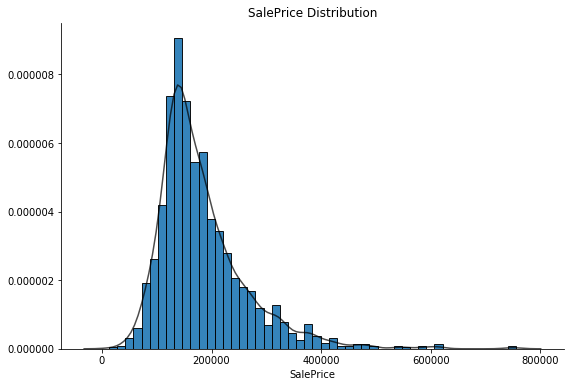

In [76]:
from statlearning import plot_dist
plot_dist(train_new['SalePrice'])
plt.title('SalePrice Distribution')
plt.show()

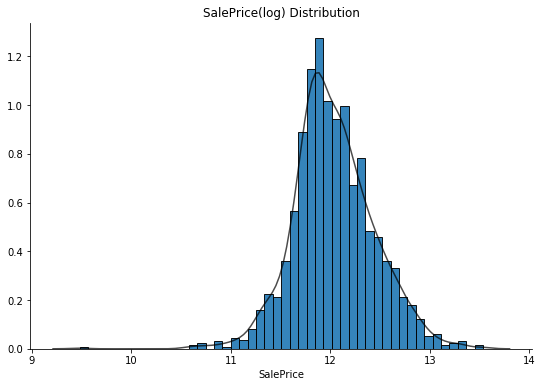

In [77]:
y_train_log=np.log(train_new['SalePrice'])
plot_dist(np.log(train_new['SalePrice']))
plt.title('SalePrice(log) Distribution')
plt.savefig('SalePrice(log) Distribution.png')
plt.show()

In [78]:
train_new['SalePrice'] = np.log(train_new['SalePrice'])

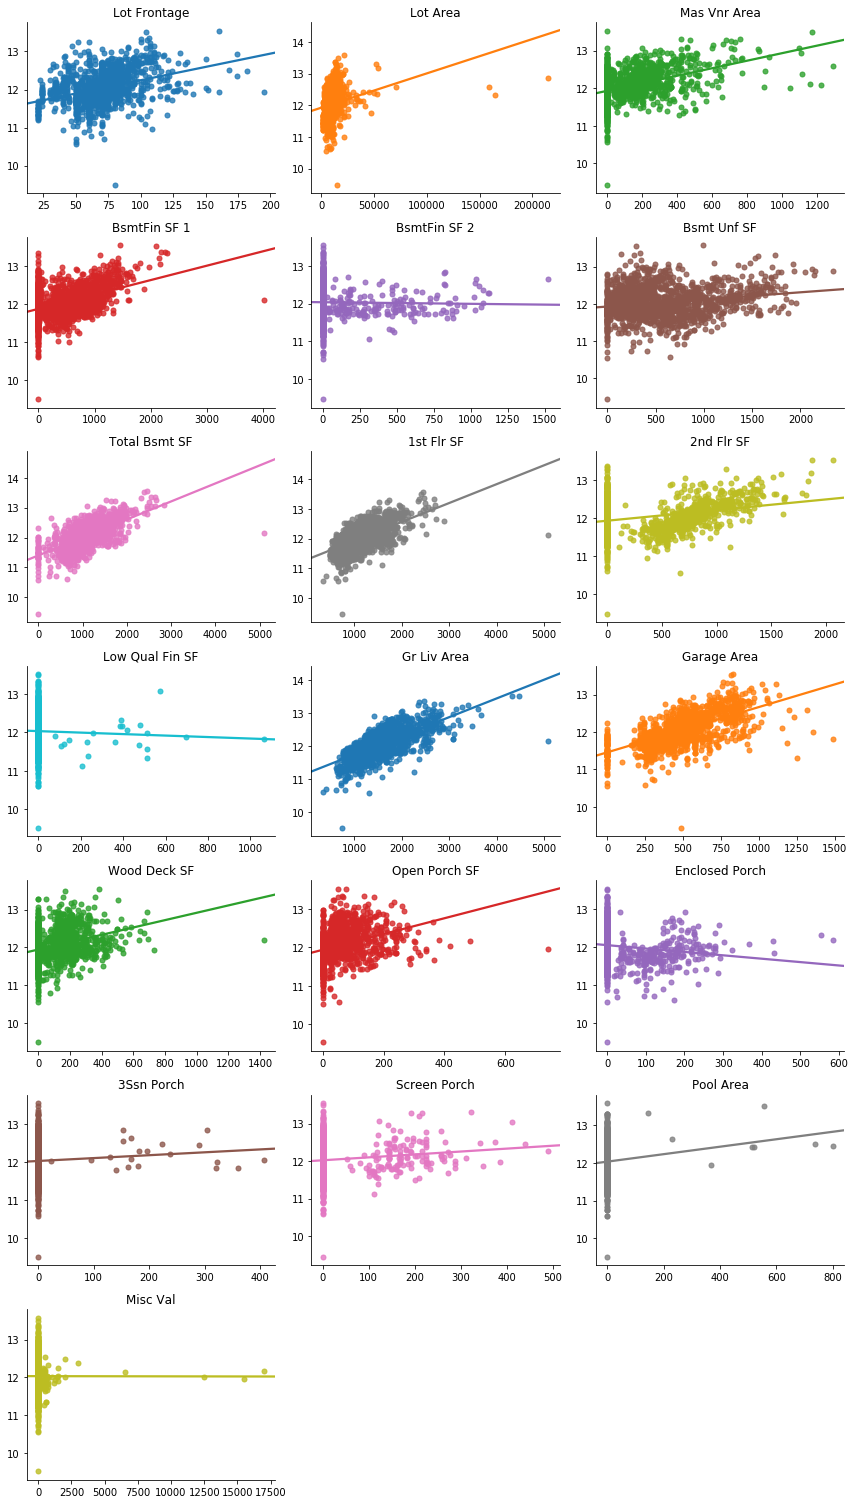

In [79]:
from statlearning import plot_regressions

plot_regressions(train_new[continuous], train_new[response])
plt.show()

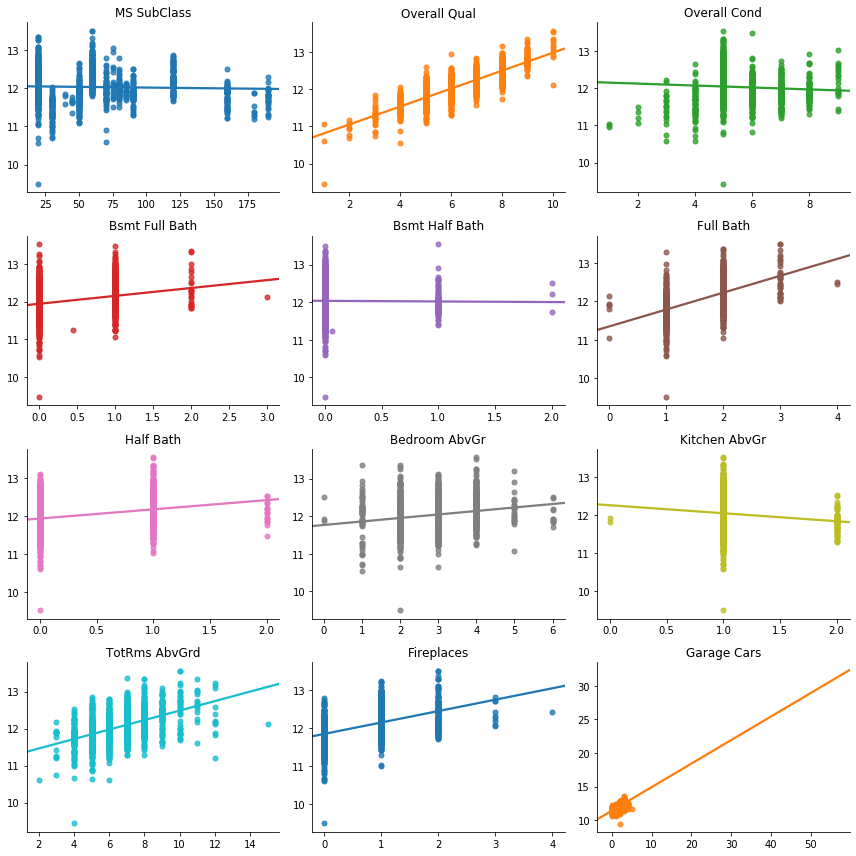

In [80]:
plot_regressions(train_new[discrete], train_new[response])
plt.show()

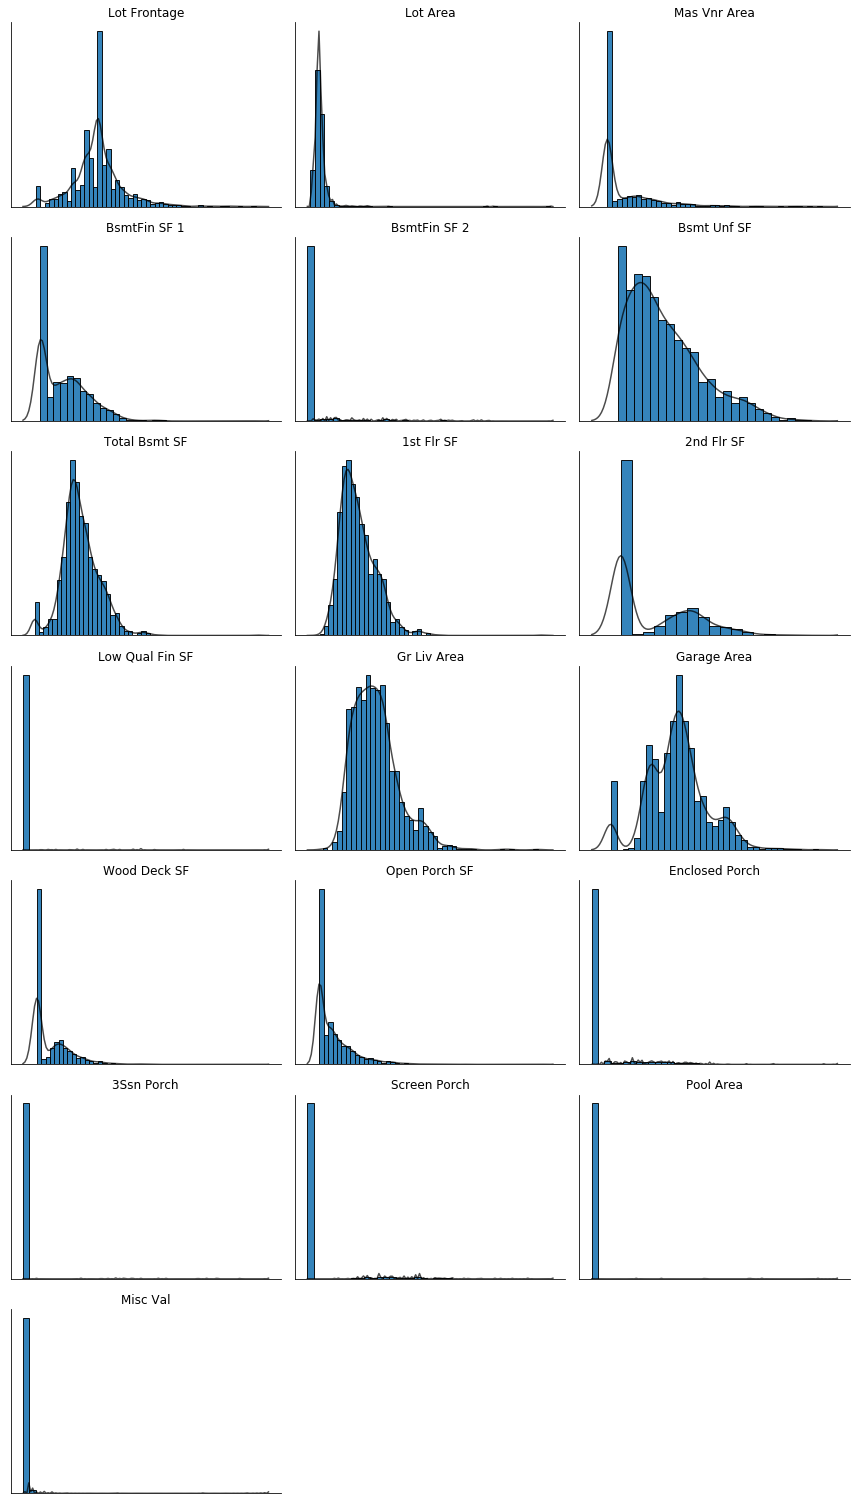

In [81]:
from statlearning import plot_dists
plot_dists(train_new[continuous]) 
plt.show()

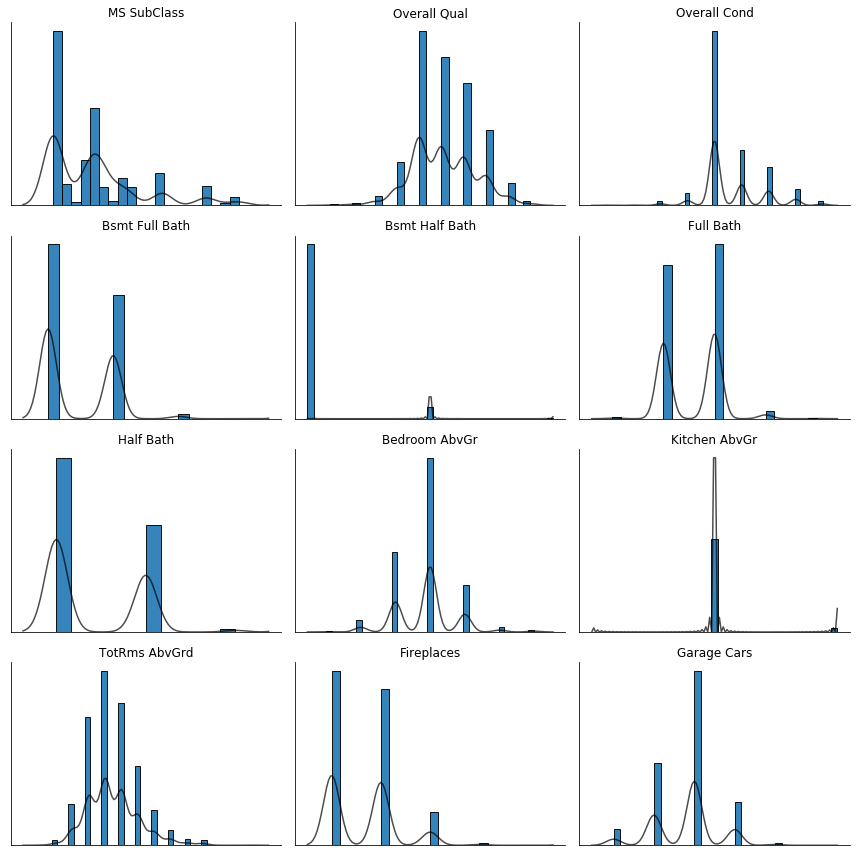

In [82]:
plot_dists(train_new[discrete]) 
plt.show()

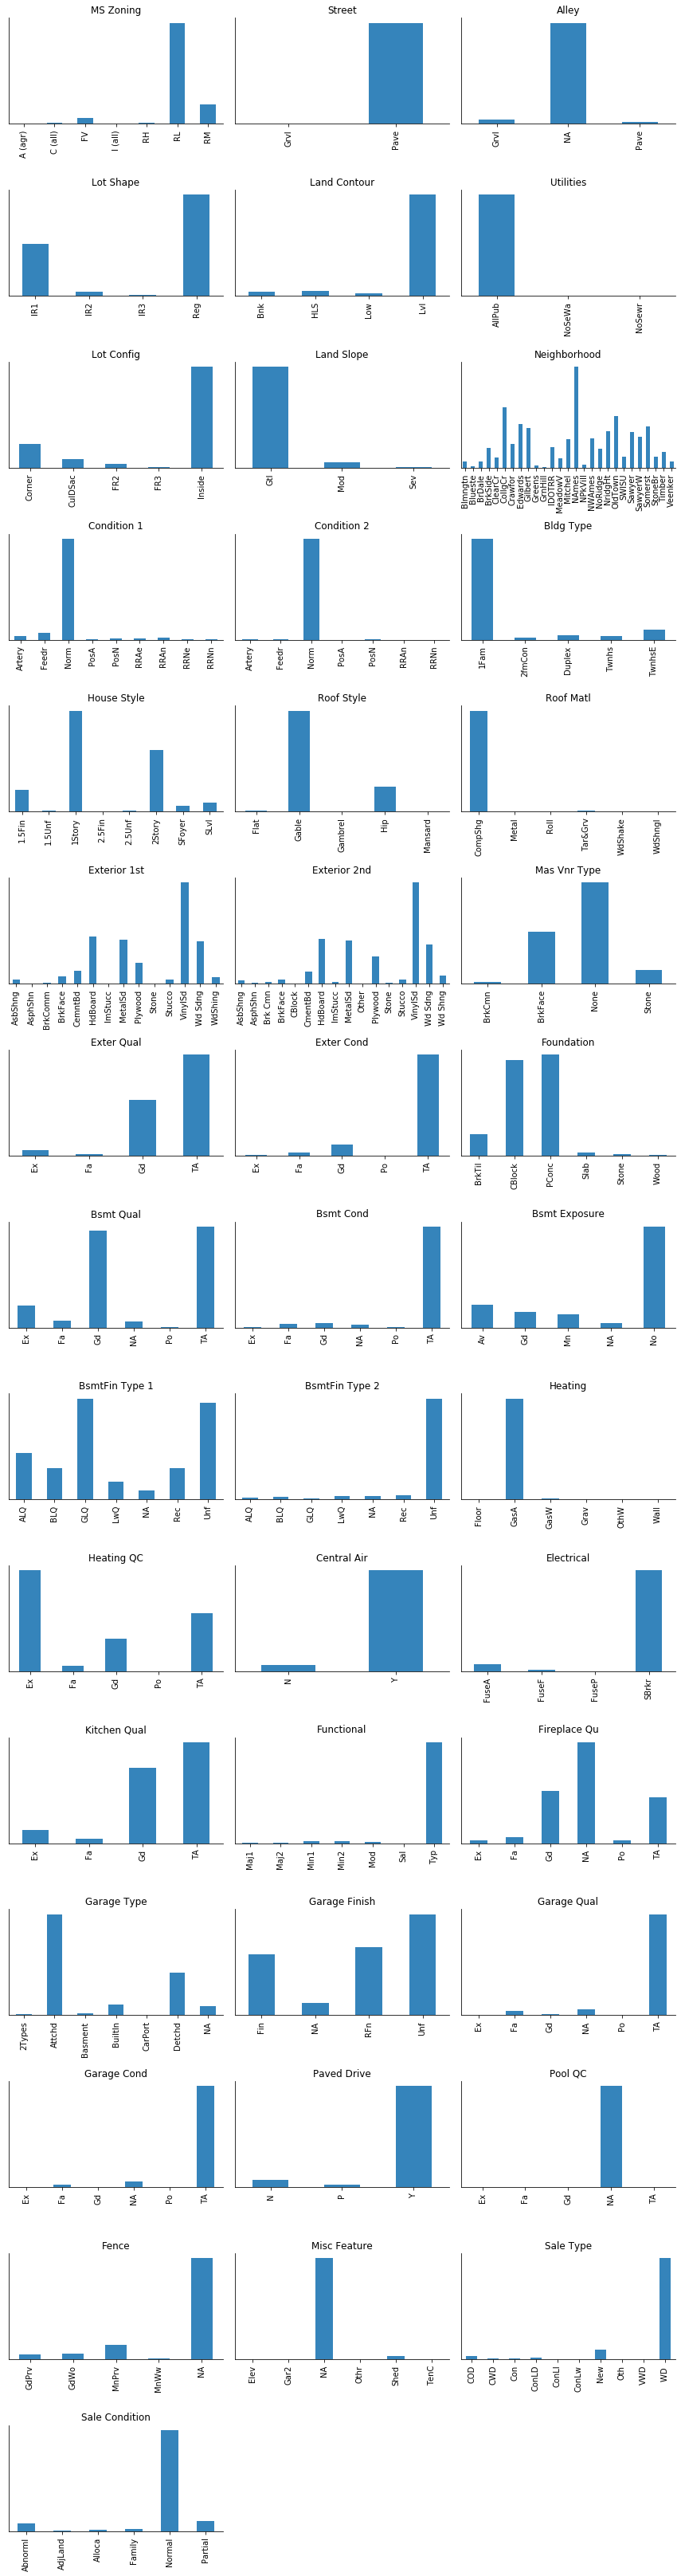

In [83]:
from statlearning import barplots
barplots(train_new[categorical])
plt.show()

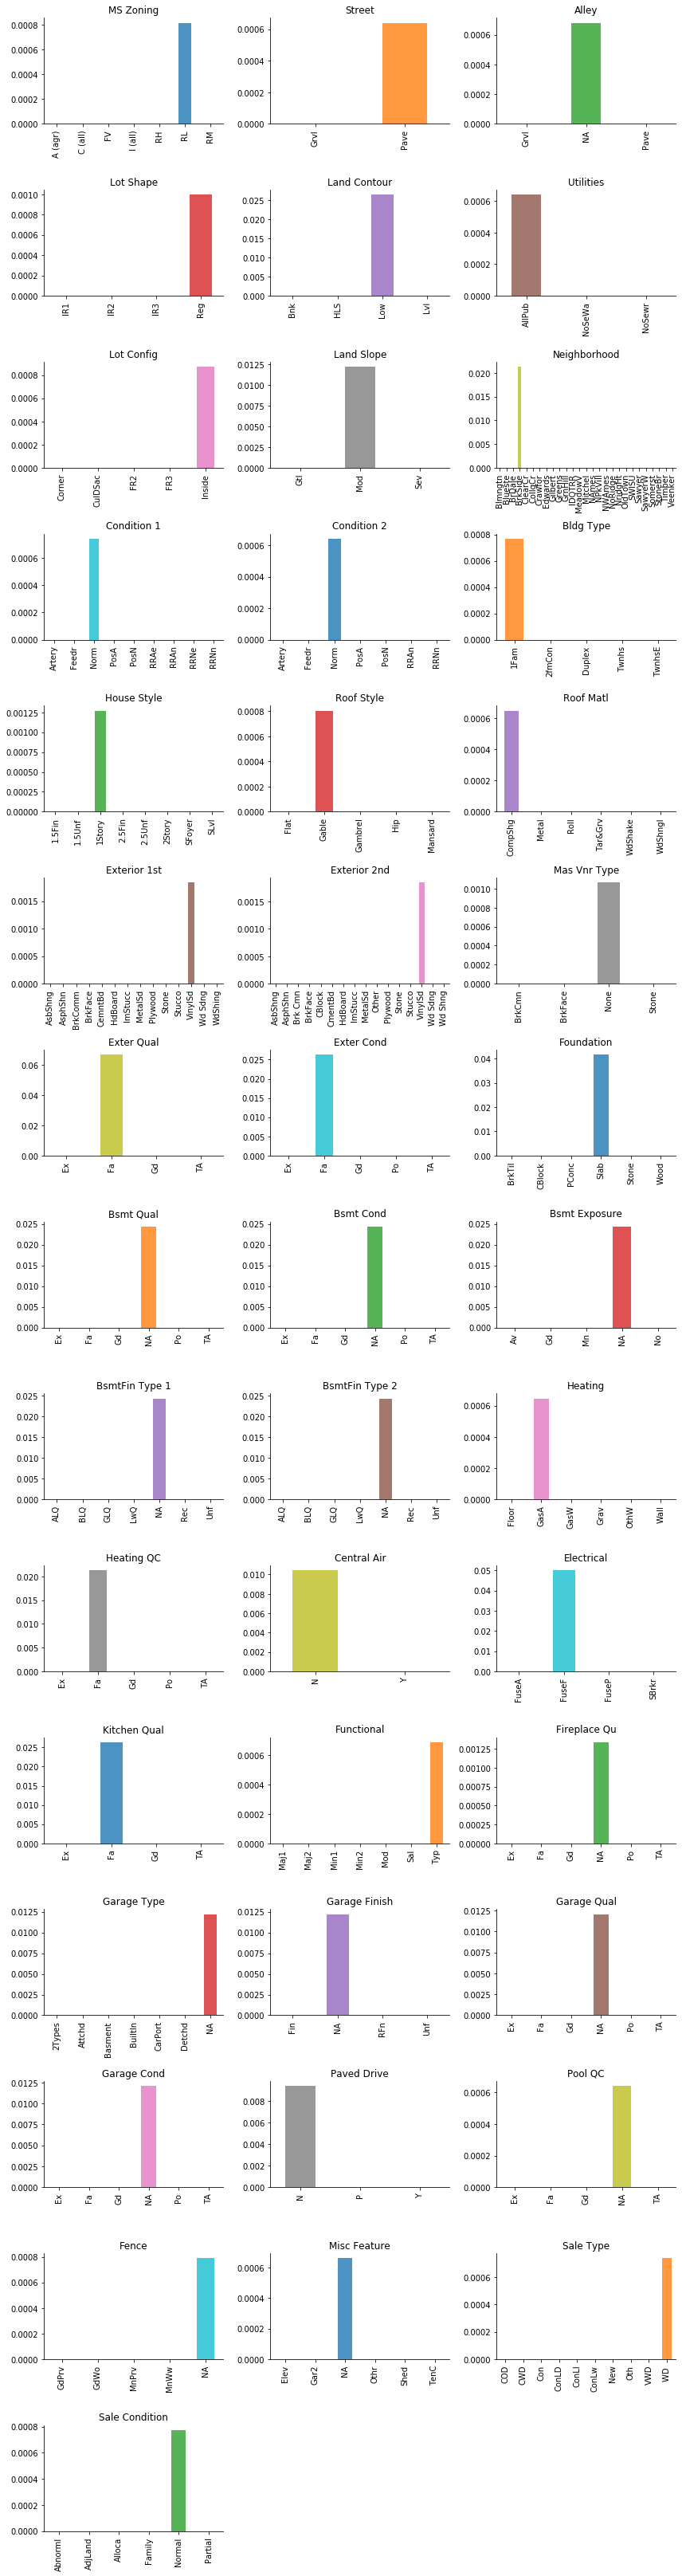

In [84]:
from statlearning import crosstabplots
crosstabplots(train_new[categorical], train_new[response])
plt.show()

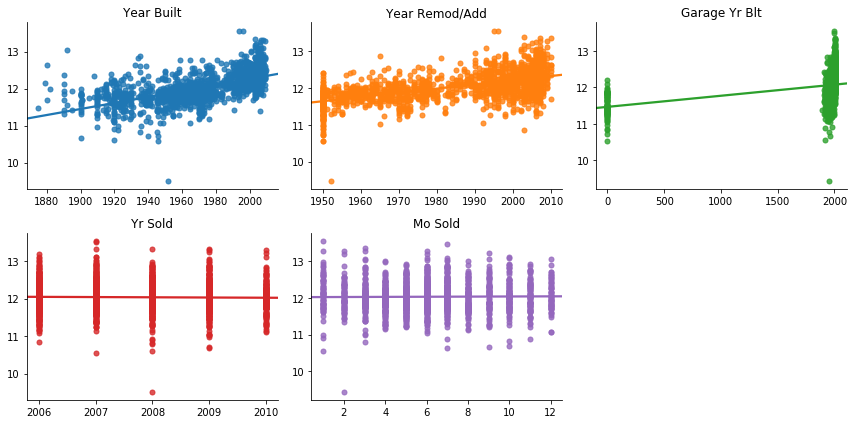

In [85]:
plot_regressions(train_new[datetime],train_new[response])
plt.show()

### Correlation

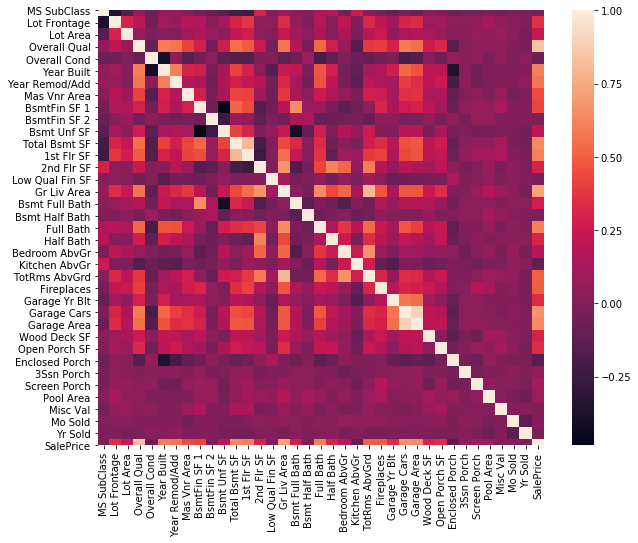

In [86]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = train_new.corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [87]:
corr = train_new.corr()['SalePrice'].abs().sort_values(ascending=False)[1:]
corr

Overall Qual       0.837636
Gr Liv Area        0.716398
Garage Cars        0.667419
Total Bsmt SF      0.645576
Garage Area        0.643949
1st Flr SF         0.608045
Year Built         0.604060
Full Bath          0.602051
Year Remod/Add     0.579209
TotRms AbvGrd      0.502015
Fireplaces         0.499246
Mas Vnr Area       0.439825
BsmtFin SF 1       0.422729
Lot Frontage       0.352693
Open Porch SF      0.342795
Garage Yr Blt      0.334116
Wood Deck SF       0.309738
Half Bath          0.307276
2nd Flr SF         0.303289
Bsmt Full Bath     0.273552
Lot Area           0.245420
Bsmt Unf SF        0.208980
Bedroom AbvGr      0.188680
Enclosed Porch     0.139967
Kitchen AbvGr      0.109065
Screen Porch       0.108983
Pool Area          0.092264
Overall Cond       0.070735
3Ssn Porch         0.049082
MS SubClass        0.038160
Low Qual Fin SF    0.024744
Yr Sold            0.019193
BsmtFin SF 2       0.017931
Mo Sold            0.012264
Bsmt Half Bath     0.010189
Misc Val           0

In [88]:
# drop least important features
# datetime data left for further analysis
drop=['Misc Val', 'Low Qual Fin SF', 'Bsmt Half Bath', 'BsmtFin SF 2', '3Ssn Porch', 'MS SubClass', 'Kitchen AbvGr', 'Screen Porch', 'Overall Cond', 'Pool Area', 'Enclosed Porch', 'Bedroom AbvGr', 'Bsmt Unf SF']
train_new=train_new.drop(drop, axis=1)
test_new=test_new.drop(drop,axis=1)
train_new.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Wood Deck SF,Open Porch SF,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,88.0,12128,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,...,0,245,NA,MnPrv,NA,11,2006,WD,Abnorml,12.250090
1,RL,48.0,6240,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,192,38,NA,NA,NA,12,2009,WD,Normal,12.445090
2,RL,120.0,17360,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,NA,NA,NA,1,2010,WD,Normal,12.058153
3,RL,73.0,8688,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,208,59,NA,NA,NA,4,2006,WD,Normal,12.354493
4,RL,88.0,15312,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NA,MnPrv,NA,3,2009,COD,Normal,11.904968


In [89]:
new_continuous=["Lot Frontage", "Lot Area",  "Mas Vnr Area", 
             "BsmtFin SF 1", "Total Bsmt SF", "1st Flr SF", "2nd Flr SF", 
             "Gr Liv Area", "Garage Area", "Wood Deck SF", "Open Porch SF"]
new_discrete=["Overall Qual", "Bsmt Full Bath", "Full Bath", 
              "Half Bath", "TotRms AbvGrd", "Fireplaces", "Garage Cars"]

## 3. Feature Engineering

### Datetime Data

In [90]:
# creating new features
# years of the house from built to sold
train_new['Years'] = train_new['Yr Sold']-train_new['Year Built']- 1 
new_continuous.append('Years')
test_new['Years'] = test_new['Yr Sold']-test_new['Year Built']-1 

In [91]:
# periods to sold after remodeled
train_new['Periods'] = train_new['Yr Sold']-train_new['Year Remod/Add']- 1 
new_continuous.append('Periods')
test_new['Periods'] = test_new['Yr Sold']-test_new['Year Remod/Add']-1 

In [92]:
train_new['Years'].head()

0    16
1     2
2    60
3     0
4    48
Name: Years, dtype: int64

In [93]:
train_new['Periods'].head()

0    16
1     2
2    59
3     0
4    48
Name: Periods, dtype: int64

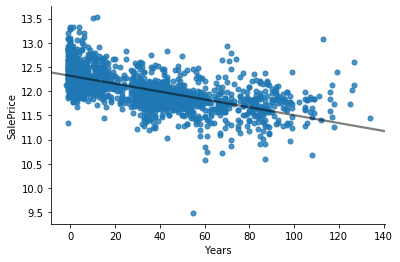

In [94]:
fig, ax = plt.subplots()
sns.regplot(train_new['Years'], train_new['SalePrice'], ci=None, scatter_kws={'s':25},
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Years')
ax.set_ylabel('SalePrice')
sns.despine()
plt.show()

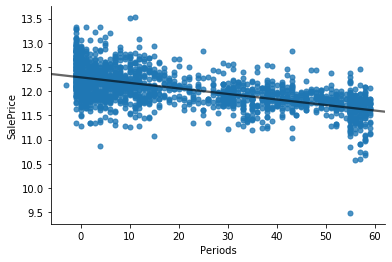

In [95]:
fig, ax = plt.subplots()
sns.regplot(train_new['Periods'], train_new['SalePrice'], ci=None, scatter_kws={'s':25},
            line_kws={'color':'black', 'alpha':0.6})
ax.set_xlabel('Periods')
ax.set_ylabel('SalePrice')
sns.despine()
plt.show()

In [96]:
train_new['Years'].isnull().sum()

0

In [97]:
train_new['Periods'].isnull().sum()

0

In [98]:
correlation=train_new['Years'].corr(train_new[response])
print(correlation)

-0.6046240290600234


In [99]:
correlation=train_new['Periods'].corr(train_new[response])
print(correlation)

-0.5812560506002312


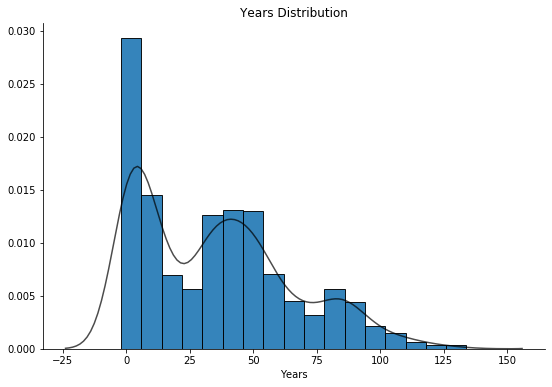

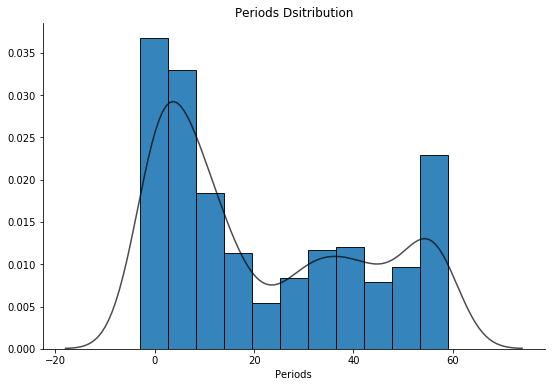

In [100]:
fig, ax  = plot_dist(train_new['Years'])
ax.set_title('Years Distribution')

fig, ax  = plot_dist(train_new['Periods'])
ax.set_title('Periods Dsitribution')

plt.show()

In [101]:
# create a new variable to show whether there is remodel happened, becasue almost half of houses in sample were not remodeled
train_new['No Remod/Add'] = (train_new['Year Remod/Add']-train_new['Year Built']==0).astype(int)
test_new['No Remod/Add'] = (test_new['Year Remod/Add']-test_new['Year Built']==0).astype(int)

In [102]:
train_new['No Remod/Add'].value_counts()

1    853
0    717
Name: No Remod/Add, dtype: int64

In [103]:
test_new['No Remod/Add'].value_counts()

1    636
0    574
Name: No Remod/Add, dtype: int64

In [104]:
correlation=train_new['No Remod/Add'].corr(train_new[response])
print(correlation)

0.08782590246505813


In [105]:
# create a new variable to show whether the house has garage, assuming zero value means no garage in this case
train_new['No Garage'] = (train_new['Garage Yr Blt']==0).astype(int)
test_new['No Garage'] = (test_new['Garage Yr Blt']==0).astype(int)
train_new['No Garage'].value_counts()

0    1487
1      83
Name: No Garage, dtype: int64

In [106]:
test_new['No Garage'].value_counts()

0    1139
1      71
Name: No Garage, dtype: int64

In [107]:
correlation=train_new['No Garage'].corr(train_new[response])
print(correlation)

-0.30596722862811226


In [108]:
drop1 = ["Year Built", "Year Remod/Add", "Garage Yr Blt", "Yr Sold", "Mo Sold", "No Remod/Add"]
train_new=train_new.drop(drop1, axis=1)
test_new=test_new.drop(drop1,axis=1)
train_new.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice,Years,Periods,No Garage
0,RL,88.0,12128,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,...,245,NA,MnPrv,NA,WD,Abnorml,12.250090,16,16,0
1,RL,48.0,6240,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,38,NA,NA,NA,WD,Normal,12.445090,2,2,0
2,RL,120.0,17360,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,...,0,NA,NA,NA,WD,Normal,12.058153,60,59,0
3,RL,73.0,8688,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,59,NA,NA,NA,WD,Normal,12.354493,0,0,0
4,RL,88.0,15312,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,MnPrv,NA,COD,Normal,11.904968,48,48,0


### Categorical Data

In [109]:
# converting ordered categorical data to ordered numerbers

grade = {
        'NA': 0, # missing of this feature
        'Po': 1, # poor
        'Fa': 2, # fair
        'TA': 3, # average/typical
        'Gd': 4, # good
        'Ex': 5, # excellent
}

train_new['Exter Qual']= train_new['Exter Qual'].replace(grade)
test_new['Exter Qual']= test_new['Exter Qual'].replace(grade)

train_new['Exter Cond']= train_new['Exter Cond'].replace(grade)
test_new['Exter Cond']= test_new['Exter Cond'].replace(grade)

train_new['Bsmt Qual']= train_new['Bsmt Qual'].replace(grade)
test_new['Bsmt Qual']= test_new['Bsmt Qual'].replace(grade)

train_new['Bsmt Cond']= train_new['Bsmt Cond'].replace(grade)
test_new['Bsmt Cond']= test_new['Bsmt Cond'].replace(grade)

train_new['Heating QC']= train_new['Heating QC'].replace(grade)
test_new['Heating QC']= test_new['Heating QC'].replace(grade)

train_new['Kitchen Qual']= train_new['Kitchen Qual'].replace(grade)
test_new['Kitchen Qual']= test_new['Kitchen Qual'].replace(grade)

train_new['Fireplace Qu']= train_new['Fireplace Qu'].replace(grade)
test_new['Fireplace Qu']= test_new['Fireplace Qu'].replace(grade)

train_new['Garage Qual']= train_new['Garage Qual'].replace(grade)
test_new['Garage Qual']= test_new['Garage Qual'].replace(grade)

train_new['Garage Cond']= train_new['Garage Cond'].replace(grade)
test_new['Garage Cond']= test_new['Garage Cond'].replace(grade)

train_new['Pool QC']= train_new['Pool QC'].replace(grade)
test_new['Pool QC']= test_new['Pool QC'].replace(grade)

In [110]:
new=['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']
for x in new:
    new_discrete.append(x)
print (new_discrete)

['Overall Qual', 'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']


In [111]:
for x in new:
    categorical.remove(x)
print (categorical)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [112]:
dummies = pd.get_dummies(train_new[categorical])
dummies.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [113]:
dummies.insert(0, "SalePrice", train_new['SalePrice'], False) 
dummies.head()

,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,12.250090,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,12.445090,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,12.058153,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,12.354493,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,11.904968,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [114]:
# Correlation of y (SalePrice)
corr_dummies = dummies.corr()['SalePrice'].abs().sort_values(ascending=False)[1:]
corr_dummies

Foundation_PConc        0.541933
BsmtFin Type 1_GLQ      0.451400
Garage Finish_Fin       0.437860
Garage Finish_Unf       0.426037
Garage Type_Attchd      0.404981
                          ...   
Exterior 2nd_BrkFace    0.004048
Misc Feature_Gar2       0.003788
Alley_Pave              0.003534
Lot Config_FR2          0.002789
House Style_2.5Unf      0.002213
Name: SalePrice, Length: 217, dtype: float64

In [115]:
for index, val in corr_dummies.iteritems():
    if val<0.2:
        print (index,val)
        

Garage Finish_RFn 0.1965202887506948
Foundation_Slab 0.1866111377329779
Fence_NA 0.183730353938702
Exterior 1st_Wd Sdng 0.1832918057438499
Exterior 2nd_Wd Sdng 0.18140560098003797
Exterior 1st_AsbShng 0.1806071726733289
Sale Condition_Abnorml 0.17826016863437594
Neighborhood_NAmes 0.17708370747986818
MS Zoning_C (all) 0.1769348504127529
Neighborhood_Edwards 0.17689415537575995
Neighborhood_BrkSide 0.17646041687190606
BsmtFin Type 1_Rec 0.1700179170655684
Neighborhood_StoneBr 0.16912497881869087
Neighborhood_Somerst 0.1655115730957724
Land Contour_HLS 0.16429981260389606
BsmtFin Type 2_Unf 0.16325017613851958
Functional_Typ 0.16210939425621723
Functional_Sal 0.1595994997639062
MS Zoning_A (agr) 0.1595994997639062
Exterior 1st_MetalSd 0.15775300832820896
Neighborhood_MeadowV 0.1573217055373457
Fence_MnPrv 0.15588464896183607
Sale Type_WD  0.1521895007037204
Exterior 2nd_AsbShng 0.15057170941038064
Alley_Grvl 0.14639323794818448
Condition 1_Feedr 0.1444961339309392
Exterior 2nd_MetalSd 0.

In [116]:
# drop features whose categories all less than 0.2
drop2=['Misc Feature', 'Roof Matl', 'Fence', 'Land Contour', 'Street', 'Alley', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'BsmtFin Type 2', 'Heating', 'Functional']
train_new=train_new.drop(drop2, axis=1)
test_new=test_new.drop(drop2,axis=1)
train_new.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Paved Drive,Wood Deck SF,Open Porch SF,Pool QC,Sale Type,Sale Condition,SalePrice,Years,Periods,No Garage
0,RL,88.0,12128,IR1,SawyerW,2Story,6,Gable,HdBoard,HdBoard,...,Y,0,245,0,WD,Abnorml,12.250090,16,16,0
1,RL,48.0,6240,Reg,NridgHt,1Story,8,Hip,MetalSd,MetalSd,...,Y,192,38,0,WD,Normal,12.445090,2,2,0
2,RL,120.0,17360,Reg,NAmes,1.5Fin,6,Gable,MetalSd,MetalSd,...,Y,0,0,0,WD,Normal,12.058153,60,59,0
3,RL,73.0,8688,Reg,Somerst,1Story,7,Gable,VinylSd,VinylSd,...,Y,208,59,0,WD,Normal,12.354493,0,0,0
4,RL,88.0,15312,Reg,Sawyer,SLvl,6,Hip,Wd Sdng,Wd Sdng,...,Y,0,0,0,COD,Normal,11.904968,48,48,0


In [117]:
for x in drop2:
    categorical.remove(x)
print (categorical)

['MS Zoning', 'Lot Shape', 'Neighborhood', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1', 'Central Air', 'Electrical', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Sale Type', 'Sale Condition']


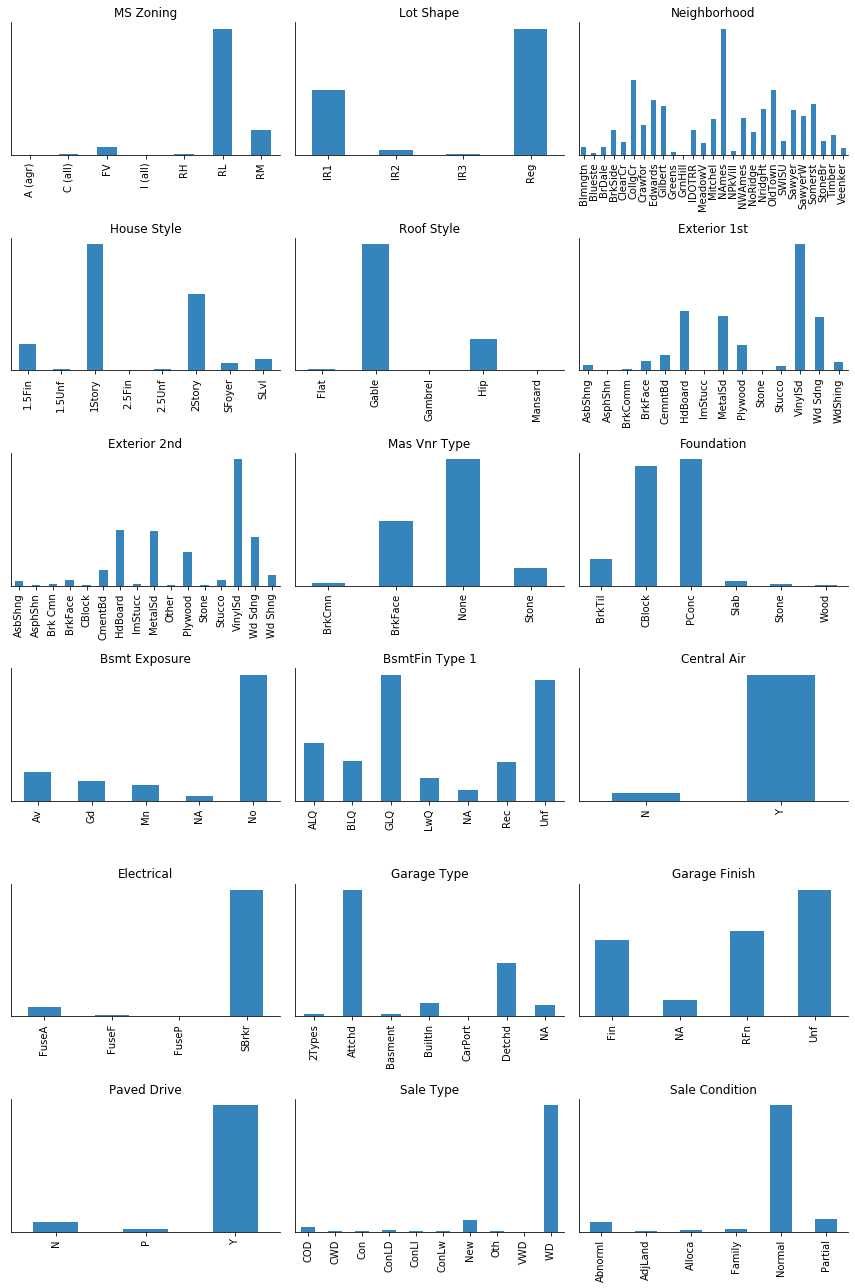

In [118]:
barplots(train_new[categorical])
plt.show()

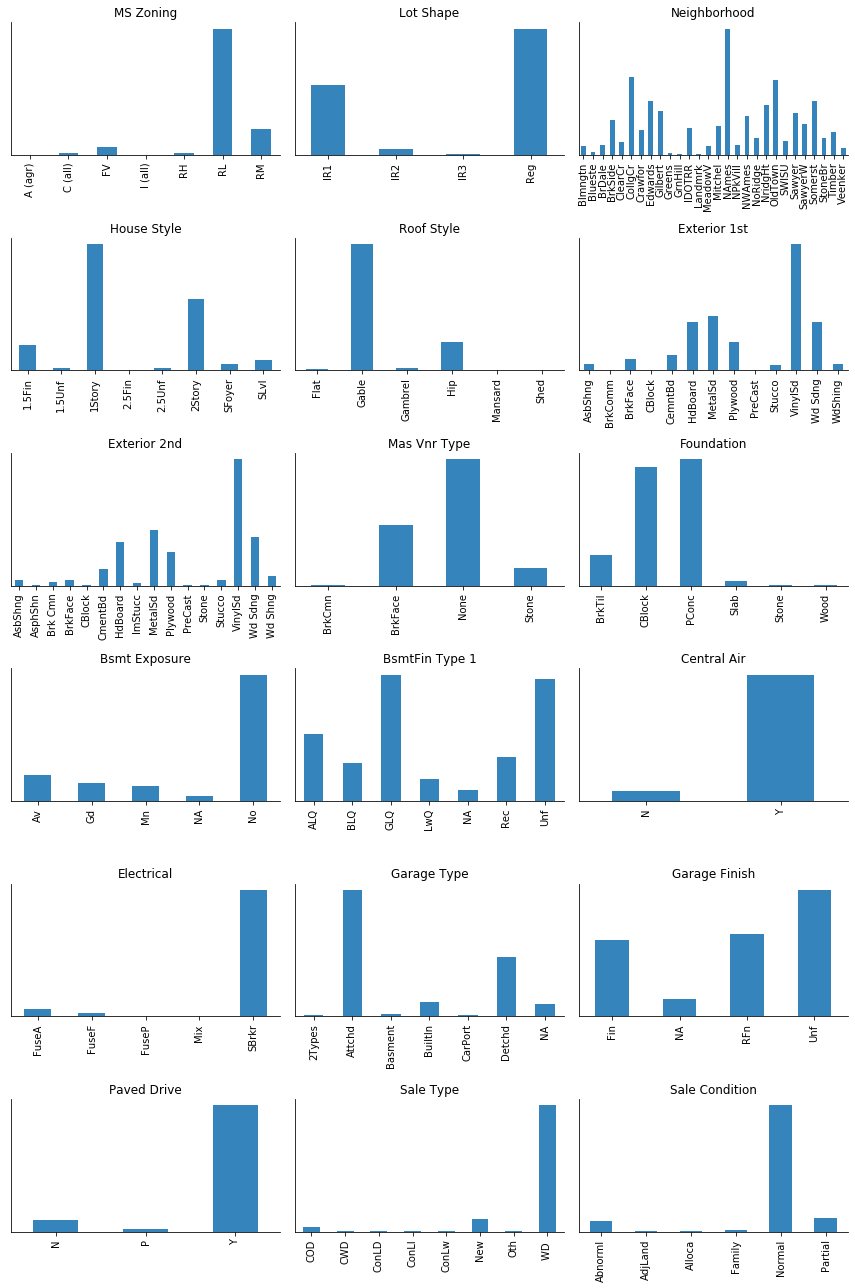

In [119]:
barplots(test_new[categorical])
plt.show()

In [120]:
dummies2 = pd.get_dummies(train_new[categorical])
dummies2.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [121]:
dummies2.insert(0, "SalePrice", train_new['SalePrice'], False) 
dummies2.head()

,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,12.250090,0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,12.445090,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,12.058153,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,12.354493,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,11.904968,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [122]:
# Correlation of y (SalePrice)
corr_dummies2 = dummies2.corr()['SalePrice'].abs().sort_values(ascending=False)[1:]
corr_dummies2

Foundation_PConc        0.541933
BsmtFin Type 1_GLQ      0.451400
Garage Finish_Fin       0.437860
Garage Finish_Unf       0.426037
Garage Type_Attchd      0.404981
                          ...   
Sale Type_CWD           0.008158
Roof Style_Mansard      0.007584
Roof Style_Flat         0.006452
Exterior 2nd_BrkFace    0.004048
House Style_2.5Unf      0.002213
Name: SalePrice, Length: 139, dtype: float64

In [123]:
for index, val in corr_dummies2.iteritems():
    if val>0.2:
        print (index,val)

Foundation_PConc 0.541933286865295
BsmtFin Type 1_GLQ 0.4514001352282078
Garage Finish_Fin 0.43785969208931325
Garage Finish_Unf 0.42603737605939945
Garage Type_Attchd 0.40498056262543486
Garage Type_Detchd 0.3998048319546192
Mas Vnr Type_None 0.3973591217699464
Neighborhood_NridgHt 0.384686585757943
Exterior 1st_VinylSd 0.36163997087262384
Central Air_N 0.35696663811617746
Central Air_Y 0.35696663811617746
Paved Drive_Y 0.3566187673774697
Exterior 2nd_VinylSd 0.3502364753375237
Paved Drive_N 0.34945374464824613
MS Zoning_RM 0.33689970863239166
Foundation_CBlock 0.3367888544436564
Sale Type_New 0.3299505684258122
Sale Condition_Partial 0.32558319099855515
Bsmt Exposure_Gd 0.3196343092458448
Lot Shape_Reg 0.31077880926212054
Garage Finish_NA 0.3073573355794257
Garage Type_NA 0.3073573355794257
Electrical_SBrkr 0.3014790094907926
MS Zoning_RL 0.2989901481349627
Mas Vnr Type_Stone 0.28216015633734975
Lot Shape_IR1 0.2668868487291497
Mas Vnr Type_BrkFace 0.2667780261643269
Neighborhood_NoR

In [124]:
# combine sparse categories with correlation less than 0.2
feature = 'MS Zoning' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'RL'and index != 'RM':
        train_new.loc[train_new[feature]==index, feature] = 'Other'

counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'RL'and index != 'RM':
        test_new.loc[test_new[feature]==index, feature] = 'Other'
        
feature = 'Lot Shape' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'Reg'and index != 'IR1':
        train_new.loc[train_new[feature]==index, feature] = 'MoreIR'

counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'Reg'and index != 'IR1':
        test_new.loc[test_new[feature]==index, feature] = 'MoreIR'
        
feature = 'House Style' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != '2Story'and index != '1.5Fin':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != '2Story'and index != '1.5Fin':
        test_new.loc[test_new[feature]==index, feature] = 'Other'

feature = 'Roof Style' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'Gable'and index != 'Hip':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'Gable'and index != 'Hip':
        test_new.loc[test_new[feature]==index, feature] = 'Other'
        
feature = 'Exterior 1st' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'VinylSd':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'VinylSd':
        test_new.loc[test_new[feature]==index, feature] = 'Other'

feature = 'Exterior 2nd' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'VinylSd':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'VinylSd':
        test_new.loc[test_new[feature]==index, feature] = 'Other'
        
feature = 'Foundation' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'PConc'and index != 'CBlock' and index != 'BrkTil':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'PConc'and index != 'CBlock' and index != 'BrkTil':
        test_new.loc[test_new[feature]==index, feature] = 'Other'
        
feature = 'Bsmt Exposure' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'No'and index != 'Gd':
        train_new.loc[train_new[feature]==index, feature] = 'LessExp'
        
feature = 'Bsmt Exposure' 
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'No'and index != 'Gd':
        test_new.loc[test_new[feature]==index, feature] = 'LessExp'

feature='BsmtFin Type 1' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'GLQ':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'GLQ':
        test_new.loc[test_new[feature]==index, feature] = 'Other'
        
feature='Electrical' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'SBrkr'and index != 'FuseA':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'SBrkr'and index != 'FuseA':
        test_new.loc[test_new[feature]==index, feature] = 'Other'

feature = 'Garage Type' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'Attchd'and index != 'Detchd' and index != 'BuiltIn' and index != 'NA':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'Attchd'and index != 'Detchd' and index != 'BuiltIn' and index != 'NA':
        test_new.loc[test_new[feature]==index, feature] = 'Other'      

feature='Paved Drive' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index == 'P':
        train_new.loc[train_new[feature]==index, feature] = 'N'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index == 'P':
        test_new.loc[test_new[feature]==index, feature] = 'N'
        
feature='Sale Condition' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'Normal'and index != 'Partial':
        train_new.loc[train_new[feature]==index, feature] = 'Other'
        
counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'Normal'and index != 'Partial':
        test_new.loc[test_new[feature]==index, feature] = 'Other'
        
feature = 'Neighborhood' 
counts = train_new[feature].value_counts() 
for index in counts.index:
    if index != 'NridgHt' and index != 'NoRidge' and index != 'StoneBr':
        train_new.loc[train_new[feature]==index, feature] = 'Other'

counts = test_new[feature].value_counts() 
for index in counts.index:
    if index != 'NridgHt' and index != 'NoRidge' and index != 'StoneBr':
        test_new.loc[test_new[feature]==index, feature] = 'Other'

In [125]:
train_new['Sale Type'].replace(to_replace=['COD', 'ConLD', 'CWD', 'ConLw', 'ConLI', 'Oth', 'Con', 'VWD'], 
                               value='Other', inplace=True)

In [126]:
test_new['Sale Type'].replace(to_replace=['COD', 'ConLD', 'CWD', 'ConLw', 'ConLI', 'Oth'], 
                              value='Other', inplace=True)

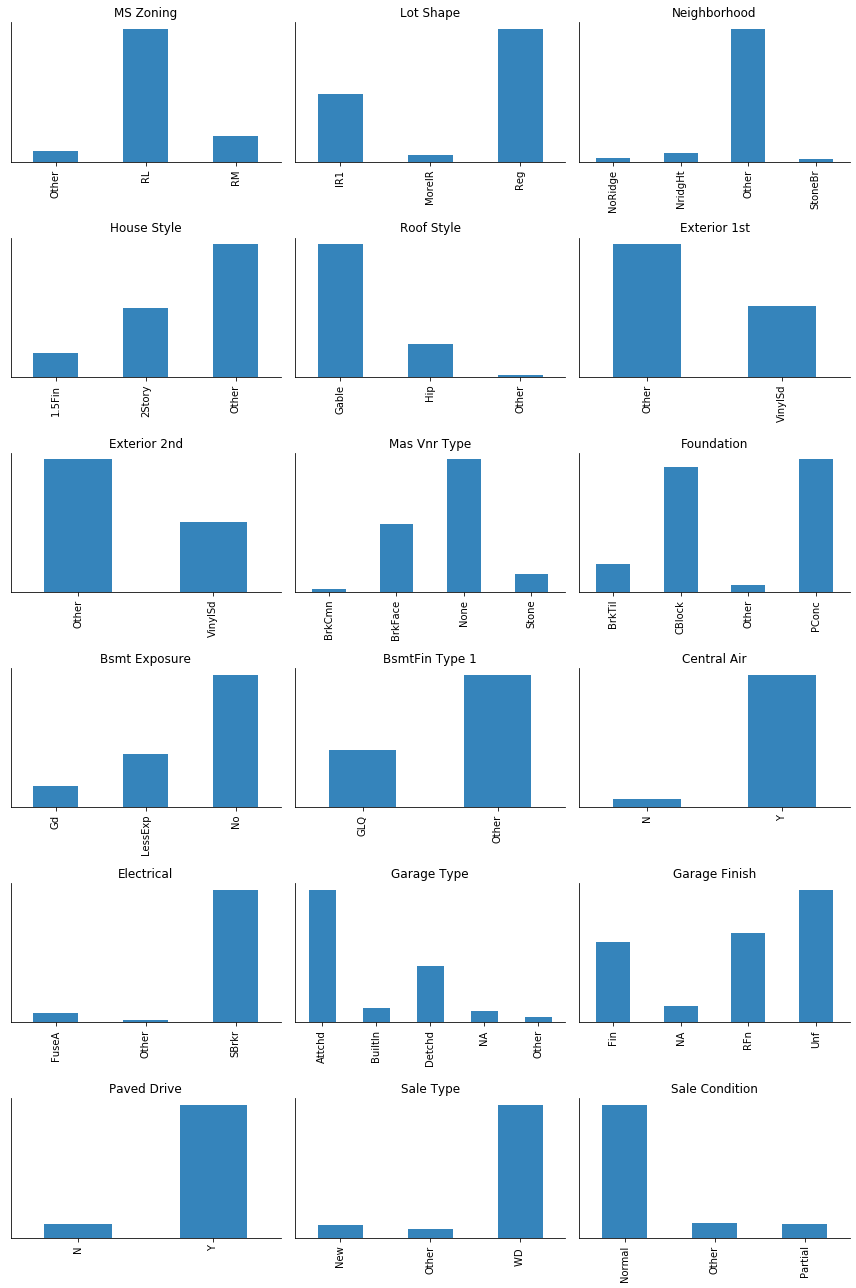

In [127]:
barplots(train_new[categorical])
plt.show()

In [128]:
train_new.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Paved Drive,Wood Deck SF,Open Porch SF,Pool QC,Sale Type,Sale Condition,SalePrice,Years,Periods,No Garage
0,RL,88.0,12128,IR1,Other,2Story,6,Gable,Other,Other,...,Y,0,245,0,WD,Other,12.250090,16,16,0
1,RL,48.0,6240,Reg,NridgHt,Other,8,Hip,Other,Other,...,Y,192,38,0,WD,Normal,12.445090,2,2,0
2,RL,120.0,17360,Reg,Other,1.5Fin,6,Gable,Other,Other,...,Y,0,0,0,WD,Normal,12.058153,60,59,0
3,RL,73.0,8688,Reg,Other,Other,7,Gable,VinylSd,VinylSd,...,Y,208,59,0,WD,Normal,12.354493,0,0,0
4,RL,88.0,15312,Reg,Other,Other,6,Hip,Other,Other,...,Y,0,0,0,Other,Normal,11.904968,48,48,0


In [129]:
train_dummies = pd.get_dummies(train_new[categorical], drop_first=True)
train_dummies.head()

,MS Zoning_RL,MS Zoning_RM,Lot Shape_MoreIR,Lot Shape_Reg,Neighborhood_NridgHt,Neighborhood_Other,Neighborhood_StoneBr,House Style_2Story,House Style_Other,Roof Style_Hip,...,Garage Type_NA,Garage Type_Other,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_Y,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0
1,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,1,0,0,1,0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,0,0


In [130]:
test_dummies = pd.get_dummies(test_new[categorical], drop_first=True)
test_dummies.head()

,MS Zoning_RL,MS Zoning_RM,Lot Shape_MoreIR,Lot Shape_Reg,Neighborhood_NridgHt,Neighborhood_Other,Neighborhood_StoneBr,House Style_2Story,House Style_Other,Roof Style_Hip,...,Garage Type_NA,Garage Type_Other,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_Y,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


In [131]:
train_remove = list(set(train_dummies.columns.values)-set(test_dummies.columns.values))
train_remove

[]

In [132]:
test_remove = list(set(test_dummies.columns.values)-set(train_dummies.columns.values))
test_remove

[]

In [133]:
train_dummies.shape

(1570, 37)

In [134]:
train_dummies.head()

,MS Zoning_RL,MS Zoning_RM,Lot Shape_MoreIR,Lot Shape_Reg,Neighborhood_NridgHt,Neighborhood_Other,Neighborhood_StoneBr,House Style_2Story,House Style_Other,Roof Style_Hip,...,Garage Type_NA,Garage Type_Other,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_Y,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0
1,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,1,0,0,1,0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,0,0


In [135]:
test_dummies.shape

(1210, 37)

In [136]:
test_dummies.head()

,MS Zoning_RL,MS Zoning_RM,Lot Shape_MoreIR,Lot Shape_Reg,Neighborhood_NridgHt,Neighborhood_Other,Neighborhood_StoneBr,House Style_2Story,House Style_Other,Roof Style_Hip,...,Garage Type_NA,Garage Type_Other,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_Y,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


In [137]:
train_new = train_new.join(train_dummies)

In [138]:
train_new.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Garage Type_NA,Garage Type_Other,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_Y,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial
0,RL,88.0,12128,IR1,Other,2Story,6,Gable,Other,Other,...,0,0,0,1,0,1,0,1,1,0
1,RL,48.0,6240,Reg,NridgHt,Other,8,Hip,Other,Other,...,0,0,0,0,0,1,0,1,0,0
2,RL,120.0,17360,Reg,Other,1.5Fin,6,Gable,Other,Other,...,0,0,0,0,1,1,0,1,0,0
3,RL,73.0,8688,Reg,Other,Other,7,Gable,VinylSd,VinylSd,...,0,0,0,1,0,1,0,1,0,0
4,RL,88.0,15312,Reg,Other,Other,6,Hip,Other,Other,...,0,0,0,1,0,1,1,0,0,0


In [139]:
test_new=test_new.join(test_dummies)
test_new.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Garage Type_NA,Garage Type_Other,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_Y,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial
0,RL,120.0,19296,Reg,Other,Other,6,Gable,Other,Other,...,0,0,0,0,1,1,0,1,0,0
1,RL,80.0,10928,Reg,Other,Other,6,Gable,VinylSd,VinylSd,...,0,0,0,1,0,1,0,1,0,0
2,RL,24.0,2280,Reg,Other,2Story,6,Gable,Other,Other,...,0,0,0,0,1,1,0,1,0,0
3,RL,60.0,8428,MoreIR,Other,Other,5,Gable,VinylSd,VinylSd,...,0,0,0,0,1,1,0,1,0,0
4,RM,50.0,9140,Reg,Other,1.5Fin,6,Gable,Other,Other,...,0,0,0,0,1,1,1,0,0,0


### Numerical Data

#### Continuous variables

In [140]:
# Remove outliers

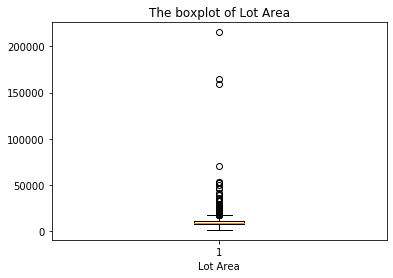

In [141]:
plt.figure()
plt.boxplot(train_new['Lot Area'])
plt.xlabel('Lot Area')
plt.title('The boxplot of Lot Area')
plt.show()

In [142]:
train_new['Lot Area'] = train_new.loc[train_new['Lot Area']<=150000, 'Lot Area']
train_new['Lot Area'].fillna(train_new['Lot Area'].median(),inplace=True)

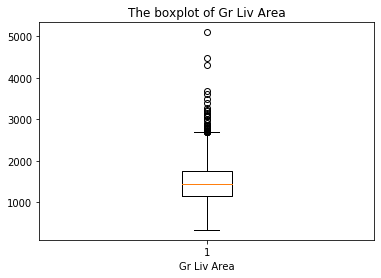

In [143]:
plt.figure()
plt.boxplot(train_new['Gr Liv Area'])
plt.xlabel('Gr Liv Area')
plt.title('The boxplot of Gr Liv Area')
plt.show()

In [144]:
train_new['Gr Liv Area'] = train_new.loc[train_new['Gr Liv Area']<=5000, 'Gr Liv Area']
train_new['Gr Liv Area'].fillna(train_new['Gr Liv Area'].median(),inplace=True)

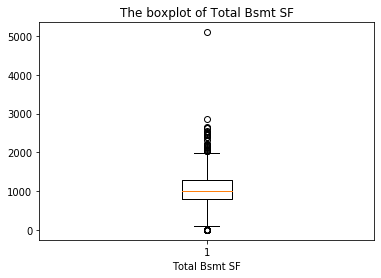

In [145]:
plt.figure()
plt.boxplot(train_new['Total Bsmt SF'])
plt.xlabel('Total Bsmt SF')
plt.title('The boxplot of Total Bsmt SF')
plt.show()

In [146]:
train_new['Total Bsmt SF'] = train_new.loc[train_new['Total Bsmt SF']<=3500, 'Total Bsmt SF']
train_new['Total Bsmt SF'].fillna(train_new['Total Bsmt SF'].median(),inplace=True)

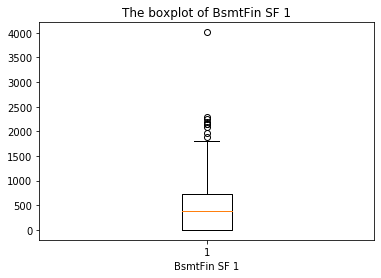

In [147]:
plt.figure()
plt.boxplot(train_new['BsmtFin SF 1'])
plt.xlabel('BsmtFin SF 1')
plt.title('The boxplot of BsmtFin SF 1')
plt.show()

In [148]:
train_new['BsmtFin SF 1'] = train_new.loc[train_new['BsmtFin SF 1']<=3000, 'BsmtFin SF 1']
train_new['BsmtFin SF 1'].fillna(train_new['BsmtFin SF 1'].median(),inplace=True)

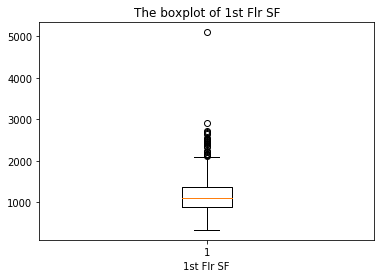

In [149]:
plt.figure()
plt.boxplot(train_new['1st Flr SF'])
plt.xlabel('1st Flr SF')
plt.title('The boxplot of 1st Flr SF')
plt.show()

In [150]:
train_new['1st Flr SF'] = train_new.loc[train_new['1st Flr SF']<=3500, '1st Flr SF']
train_new['1st Flr SF'].fillna(train_new['1st Flr SF'].median(),inplace=True)

#### Continuous variables

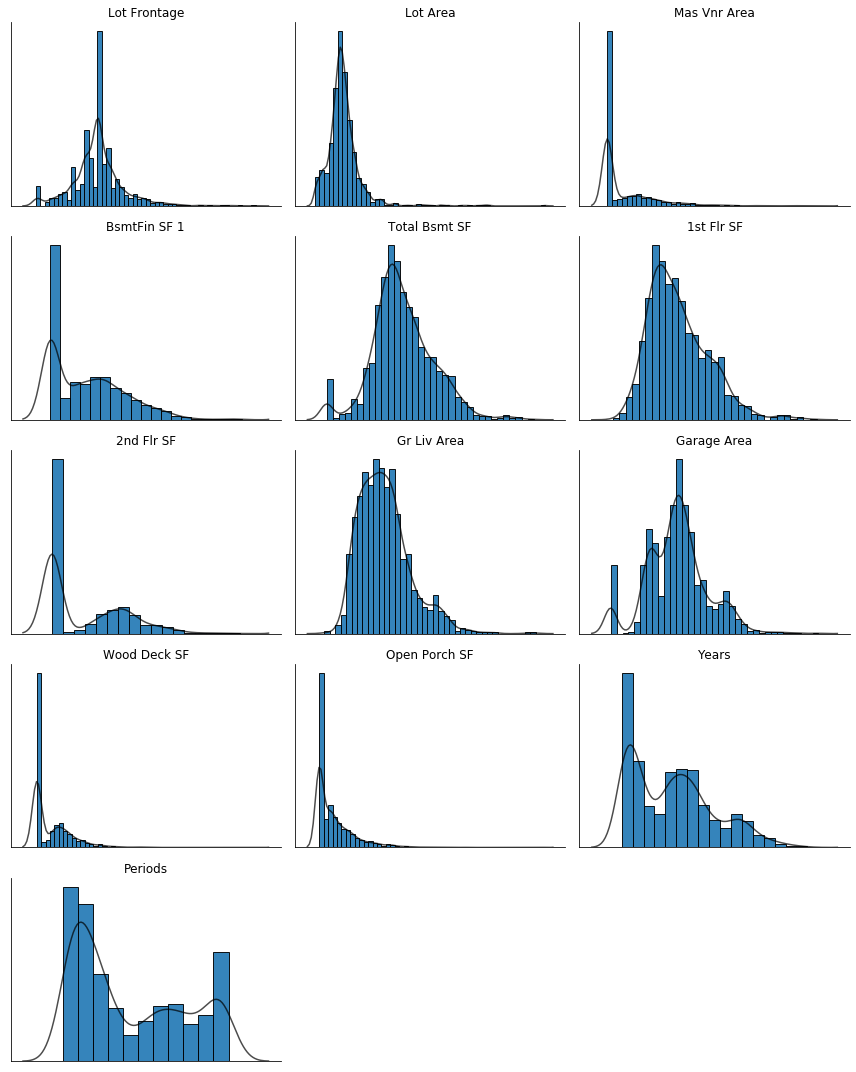

In [151]:
plot_dists(train_new[new_continuous]) 
plt.show()

In [152]:
# create a dummy variable for features that have zero values to show whether the house has this feature, assuming that zero means missing of this feature 

In [153]:
train_new['No Bsmt'] = (train_new['Total Bsmt SF']==0).astype(int)
train_new['No Mas Vnr Area'] = (train_new['Mas Vnr Area']==0).astype(int)
train_new['Bsmt no Fin SF'] = (train_new['BsmtFin SF 1']==0).astype(int)
train_new['No_Garage'] = (train_new['Garage Area']==0).astype(int)
train_new['No 2nd Flr'] = (train_new['2nd Flr SF']==0).astype(int)
train_new['No Open Porch'] = (train_new['Open Porch SF']==0).astype(int)
train_new['No Wood Deck'] = (train_new['Wood Deck SF']==0).astype(int)

test_new['No Bsmt'] = (test_new['Total Bsmt SF']==0).astype(int)
test_new['No Mas Vnr Area'] = (test_new['Mas Vnr Area']==0).astype(int)
test_new['Bsmt no Fin SF'] = (test_new['BsmtFin SF 1']==0).astype(int)
test_new['No_Garage'] = (test_new['Garage Area']==0).astype(int)
test_new['No 2nd Flr'] = (test_new['2nd Flr SF']==0).astype(int)
test_new['No Open Porch'] = (test_new['Open Porch SF']==0).astype(int)
test_new['No Wood Deck'] = (test_new['Wood Deck SF']==0).astype(int)

In [154]:
correlation=train_new['No Bsmt'].corr(train_new['SalePrice'])
print(correlation)

-0.2378450249512127


In [155]:
correlation=train_new['No Mas Vnr Area'].corr(train_new['SalePrice'])
print(correlation)

-0.3933648684234421


In [156]:
correlation=train_new['Bsmt no Fin SF'].corr(train_new['SalePrice'])
print(correlation)

-0.19003795978862165


In [157]:
correlation=train_new['No_Garage'].corr(train_new['SalePrice'])
print(correlation)

-0.30735733557942735


In [158]:
correlation=train_new['No 2nd Flr'].corr(train_new['SalePrice'])
print(correlation)

-0.11812899508387248


In [159]:
correlation=train_new['No Open Porch'].corr(train_new['SalePrice'])
print(correlation)

-0.4714629196477562


In [160]:
correlation=train_new['No Wood Deck'].corr(train_new['SalePrice'])
print(correlation)

-0.3162323651583646


In [161]:
correlation=train_new['Garage Finish_NA'].corr(train_new['No_Garage'])
print(correlation)

1.0


In [162]:
correlation=train_new['No Garage'].corr(train_new['No_Garage'])
print(correlation)

0.9936236013309581


In [163]:
correlation=train_new['Garage Type_NA'].corr(train_new['No_Garage'])
print(correlation)

1.0


In [164]:
correlation=train_new['No Mas Vnr Area'].corr(train_new['Mas Vnr Type_None'])
print(correlation)

0.9946949512493052


In [165]:
# drop variables that share the same information
drop3=['No Garage', 'Garage Type_NA', 'Garage Finish_NA', 'No Mas Vnr Area']
train_new=train_new.drop(drop3, axis=1)
test_new=test_new.drop(drop3,axis=1)
train_new.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial,No Bsmt,Bsmt no Fin SF,No_Garage,No 2nd Flr,No Open Porch,No Wood Deck
0,RL,88.0,12128.0,IR1,Other,2Story,6,Gable,Other,Other,...,0,1,1,0,0,0,0,0,0,1
1,RL,48.0,6240.0,Reg,NridgHt,Other,8,Hip,Other,Other,...,0,1,0,0,0,0,0,1,0,0
2,RL,120.0,17360.0,Reg,Other,1.5Fin,6,Gable,Other,Other,...,0,1,0,0,0,0,0,0,1,1
3,RL,73.0,8688.0,Reg,Other,Other,7,Gable,VinylSd,VinylSd,...,0,1,0,0,0,1,0,1,0,0
4,RL,88.0,15312.0,Reg,Other,Other,6,Hip,Other,Other,...,1,0,0,0,0,0,0,1,1,1


#### Discrete Variables

In [166]:
print(new_discrete)

['Overall Qual', 'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']


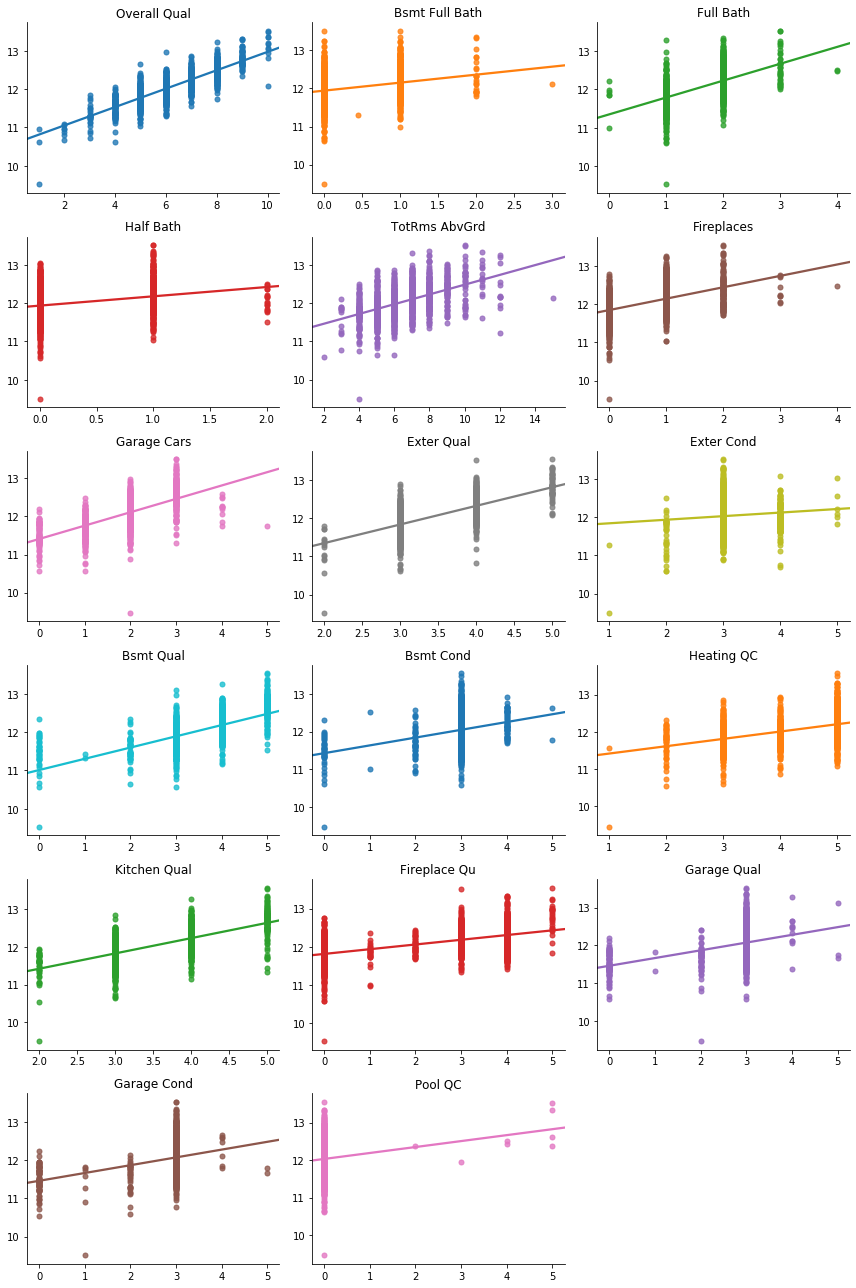

In [167]:
plot_regressions(train_new[new_discrete], train_new[response])
plt.show()

In [168]:
correlation=train_new['Exter Cond'].corr(train_new['SalePrice'])
print(correlation)

0.08544058191362806


In [169]:
correlation=train_new['Bsmt Cond'].corr(train_new['SalePrice'])
print(correlation)

0.28439928474045867


In [170]:
correlation=train_new['Garage Cond'].corr(train_new['SalePrice'])
print(correlation)

0.3546925841266643


In [171]:
correlation=train_new['Fireplace Qu'].corr(train_new['SalePrice'])
print(correlation)

0.5503593614533918


In [172]:
correlation=train_new['Pool QC'].corr(train_new['SalePrice'])
print(correlation)

0.11903271729250102


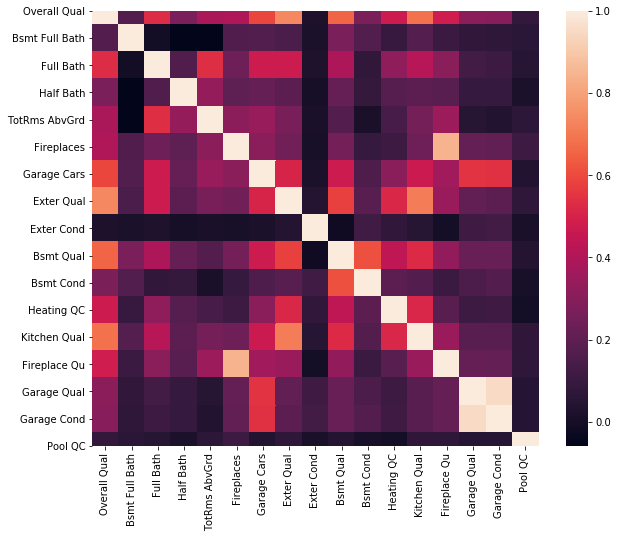

In [173]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = train_new[new_discrete].corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [174]:
# drop Pool QC becasue large amount of zeros
# drop Exter Cond because weak correlation
# drop Garage Cond becasue it's highly correlated with Garage Qual
# drop Bsmt Cond becasue it's highly correlated with Bsmt Qual and weakly correlated with sale price
drop4=['Pool QC', 'Exter Cond', 'Garage Cond', 'Bsmt Cond']

In [175]:
train_new=train_new.drop(drop4, axis=1)
test_new=test_new.drop(drop4,axis=1)
train_new.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial,No Bsmt,Bsmt no Fin SF,No_Garage,No 2nd Flr,No Open Porch,No Wood Deck
0,RL,88.0,12128.0,IR1,Other,2Story,6,Gable,Other,Other,...,0,1,1,0,0,0,0,0,0,1
1,RL,48.0,6240.0,Reg,NridgHt,Other,8,Hip,Other,Other,...,0,1,0,0,0,0,0,1,0,0
2,RL,120.0,17360.0,Reg,Other,1.5Fin,6,Gable,Other,Other,...,0,1,0,0,0,0,0,0,1,1
3,RL,73.0,8688.0,Reg,Other,Other,7,Gable,VinylSd,VinylSd,...,0,1,0,0,0,1,0,1,0,0
4,RL,88.0,15312.0,Reg,Other,Other,6,Hip,Other,Other,...,1,0,0,0,0,0,0,1,1,1


In [176]:
test_new.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial,No Bsmt,Bsmt no Fin SF,No_Garage,No 2nd Flr,No Open Porch,No Wood Deck
0,RL,120.0,19296,Reg,Other,Other,6,Gable,Other,Other,...,0,1,0,0,0,0,0,1,1,1
1,RL,80.0,10928,Reg,Other,Other,6,Gable,VinylSd,VinylSd,...,0,1,0,0,0,0,0,1,0,0
2,RL,24.0,2280,Reg,Other,2Story,6,Gable,Other,Other,...,0,1,0,0,0,0,0,0,1,0
3,RL,60.0,8428,MoreIR,Other,Other,5,Gable,VinylSd,VinylSd,...,0,1,0,0,0,0,0,1,1,0
4,RM,50.0,9140,Reg,Other,1.5Fin,6,Gable,Other,Other,...,1,0,0,0,0,0,0,0,0,1


In [177]:
x_test = test_new.drop(test_new[categorical], axis=1)

In [178]:
x_test.head()

,Lot Frontage,Lot Area,Overall Qual,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,...,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial,No Bsmt,Bsmt no Fin SF,No_Garage,No 2nd Flr,No Open Porch,No Wood Deck
0,120.0,19296,6,399.0,3,3,672,1362,3,1382,...,0,1,0,0,0,0,0,1,1,1
1,80.0,10928,6,101.0,3,3,363,1427,3,1671,...,0,1,0,0,0,0,0,1,0,0
2,24.0,2280,6,0.0,3,4,566,855,3,855,...,0,1,0,0,0,0,0,0,1,0
3,60.0,8428,5,0.0,3,4,420,990,5,990,...,0,1,0,0,0,0,0,1,1,0
4,50.0,9140,6,0.0,3,3,308,629,2,727,...,1,0,0,0,0,0,0,0,0,1


In [179]:
y_train = train_new.loc[:, 'SalePrice']
x_train = train_new.drop(response, axis=1)
x_train.shape

(1570, 85)

In [180]:
x_train.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,...,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial,No Bsmt,Bsmt no Fin SF,No_Garage,No 2nd Flr,No Open Porch,No Wood Deck
0,RL,88.0,12128.0,IR1,Other,2Story,6,Gable,Other,Other,...,0,1,1,0,0,0,0,0,0,1
1,RL,48.0,6240.0,Reg,NridgHt,Other,8,Hip,Other,Other,...,0,1,0,0,0,0,0,1,0,0
2,RL,120.0,17360.0,Reg,Other,1.5Fin,6,Gable,Other,Other,...,0,1,0,0,0,0,0,0,1,1
3,RL,73.0,8688.0,Reg,Other,Other,7,Gable,VinylSd,VinylSd,...,0,1,0,0,0,1,0,1,0,0
4,RL,88.0,15312.0,Reg,Other,Other,6,Hip,Other,Other,...,1,0,0,0,0,0,0,1,1,1


In [181]:
x_train = x_train.drop(train_new[categorical], axis=1)

In [182]:
x_train.head()

,Lot Frontage,Lot Area,Overall Qual,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,...,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Sale Condition_Partial,No Bsmt,Bsmt no Fin SF,No_Garage,No 2nd Flr,No Open Porch,No Wood Deck
0,88.0,12128.0,6,232.0,4,4,549.0,868.0,5,1313.0,...,0,1,1,0,0,0,0,0,0,1
1,48.0,6240.0,8,176.0,4,4,863.0,1324.0,5,1324.0,...,0,1,0,0,0,0,0,1,0,0
2,120.0,17360.0,6,340.0,3,3,300.0,782.0,3,1019.0,...,0,1,0,0,0,0,0,0,1,1
3,73.0,8688.0,7,228.0,4,4,0.0,1616.0,5,1616.0,...,0,1,0,0,0,1,0,1,0,0
4,88.0,15312.0,6,54.0,3,3,588.0,1138.0,5,1138.0,...,1,0,0,0,0,0,0,1,1,1


In [183]:
y_train.head()

0    12.250090
1    12.445090
2    12.058153
3    12.354493
4    11.904968
Name: SalePrice, dtype: float64

In [184]:
response='SalePrice'
predictors =  [variable for variable in x_train.columns if variable!=response]

In [185]:
# Training-Validation Split
from sklearn.model_selection import train_test_split
X_train = x_train
Y_train = y_train
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=15)

## 4. Methodologies

## Lasso

In [186]:
from sklearn.linear_model import LassoCV
from statlearning import plot_coefficients
import math
from math import radians,sin,cos,asin,sqrt
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from statlearning import plot_feature_importance

In [187]:
lasso = LassoCV(cv=5)
lasso.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

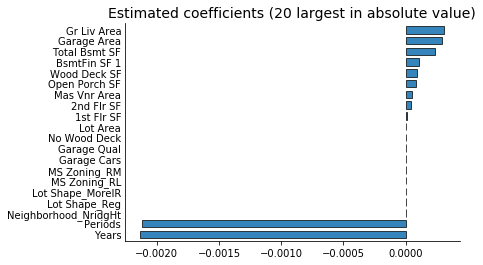

In [188]:
plot_coefficients(lasso, predictors)
plt.show()

In [189]:
print(lasso.intercept_)
print(lasso.coef_)

11.176071347253933
[ 0.00000000e+00  3.30191374e-06  0.00000000e+00  4.75712472e-05
  0.00000000e+00  0.00000000e+00  1.10336285e-04  2.32023448e-04
  0.00000000e+00  1.33751581e-05  4.24965600e-05  3.10641156e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.88475845e-04  0.00000000e+00  8.73710155e-05  8.57226209e-05
 -2.13637313e-03 -2.11595133e-03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00

In [190]:
lasso_pred = lasso.predict(x_test)

In [191]:
lasso_pred_list = lasso_pred.tolist()

In [192]:
import math
from math import radians,sin,cos,asin,sqrt

In [193]:
lasso_pred=[]
for i in lasso_pred_list:
    lasso_pred.append(int(round(math.exp(i))))

In [194]:
submission_lasso = pd.DataFrame(lasso_pred, index=test['Test_ID'], columns =[response])

In [195]:
submission_lasso.head()

,SalePrice
Test_ID,
1,190256
2,195879
3,152079
4,144760
5,118312


In [196]:
submission_lasso.to_csv('submission_lasso.csv')

## Decision Tree

In [197]:
from sklearn import tree
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from statlearning import plot_feature_importance

In [198]:
dt = tree.DecisionTreeRegressor(random_state = 0)
param_grid = {'max_depth': np.arange(1,30,1)}
clf = GridSearchCV(dt, param_grid)
clf = clf.fit(x_train, y_train)
clf

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', r

In [199]:
print(clf.best_params_)

{'max_depth': 6}


In [200]:
clf_dt = tree.DecisionTreeRegressor(max_depth = 6)
clf_dt = clf.fit(x_train, y_train)
clf_dt

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', r

In [201]:
clf_dt.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [202]:
print(clf_dt.best_score_)

0.7659853650210897


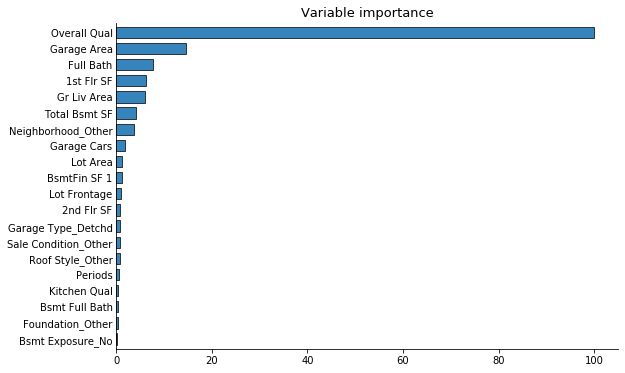

In [203]:
plot_feature_importance(clf_dt.best_estimator_, predictors)
plt.show()

In [204]:
dt_pred = clf_dt.predict(x_test)

In [205]:
dt_pred_list = dt_pred.tolist()

In [206]:
dt_pred=[]
for i in dt_pred_list:
    dt_pred.append(int(round(math.exp(i))))

In [207]:
submission_dt = pd.DataFrame(dt_pred, index=test['Test_ID'], columns =[response])

In [208]:
submission_dt.head()

,SalePrice
Test_ID,
1,150574
2,178137
3,178137
4,122134
5,122134


In [209]:
submission_dt.to_csv('submission_dt.csv')

## XGBoost

In [210]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [211]:
%%time

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0)

tuning_parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.05, 0.1, 0.2],
    'n_estimators' : [50, 100, 200, 250, 300, 500, 700, 750, 1000, 1200, 1500],
    'max_depth' : [2,3,4,5,6,7,8],
    'subsample' : [0.6, 0.8, 1.0]
}

clf_xgb = RandomizedSearchCV(xgb_model, tuning_parameters, n_iter = 64, cv = 10, random_state=87, n_jobs=4)
clf_xgb.fit(x_train, y_train)

CPU times: user 14.7 s, sys: 604 ms, total: 15.3 s
Wall time: 36min 55s


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          ra...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='warn', n_iter=64, n_jobs=4,
  

In [212]:
print('Best parameters found by randomised search:', clf_xgb.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01} 



In [213]:
print(clf_xgb.best_score_)

0.9041907813483672


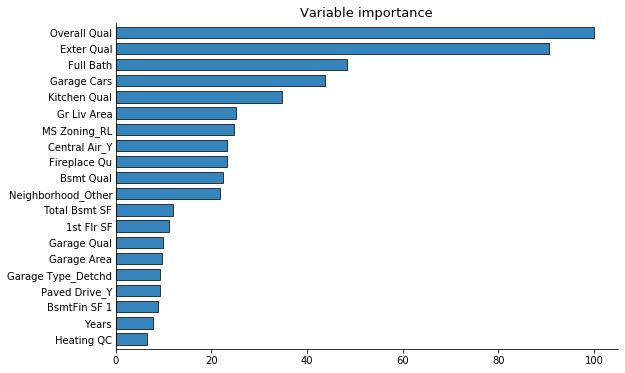

In [214]:
plot_feature_importance(clf_xgb.best_estimator_, labels=predictors)
plt.show()

In [215]:
clf_xgb = xgb.XGBRegressor(learning_rate = 0.01, max_depth = 3, n_estimators = 1500, subsample = 0.8)
clf_xgb = clf_xgb.fit(x_train, y_train)
clf_xgb

[11:19:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [216]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
x_test['Garage Qual'] = lbl.fit_transform(x_test['Garage Qual'].astype(str))

In [217]:
xgb_pred = clf_xgb.predict(x_test)

In [218]:
xgb_pred_list = xgb_pred.tolist()

In [219]:
xgb_pred=[]
for i in xgb_pred_list:
    xgb_pred.append(int(round(math.exp(i))))

In [220]:
submission_xgb = pd.DataFrame(xgb_pred, index=test['Test_ID'], columns =[response])

In [221]:
submission_xgb.head()

,SalePrice
Test_ID,
1,172114
2,175553
3,146813
4,140978
5,113115


In [222]:
submission_xgb.to_csv('submission_xgb.csv')

## Random Forest

In [223]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [224]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': np.arange(1,100,10),
              'max_depth': np.arange(1,30,1), }
clf_cv = GridSearchCV(RandomForestRegressor(), param_grid)
clf_cv.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2

In [225]:
clf = clf_cv.best_estimator_
print(clf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=21,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=61,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [226]:
rf_pre=clf.predict(x_test)

In [241]:
rf_pred_list = rf_pre.tolist()

In [243]:
rf_pre=[]
for i in rf_pred_list:
    rf_pre.append(int(round(math.exp(i))))

In [245]:
submission_rf = pd.DataFrame(rf_pre, index=test['Test_ID'], columns =[response])

In [246]:
submission_rf.head()

,SalePrice
Test_ID,
1,165039
2,175804
3,149859
4,131496
5,110049


In [247]:
submission_rf.to_csv('submission_rf.csv')

## AdaBoost

In [230]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [231]:
param_grid = {'n_estimators': np.arange(1,100,10),
              'learning_rate': np.arange(0.01,10,0.2)}
ada_cv = GridSearchCV(AdaBoostRegressor(), param_grid)
ada_cv.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]),
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [232]:
ada = ada_cv.best_estimator_
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=3.21, loss='linear',
                  n_estimators=91, random_state=None)


In [233]:
ada_pre=ada.predict(x_test)

In [248]:
ada_pred_list = ada_pre.tolist()

In [249]:
ada_pre=[]
for i in ada_pred_list:
    ada_pre.append(int(round(math.exp(i))))

In [250]:
submission_ada = pd.DataFrame(ada_pre, index=test['Test_ID'], columns =[response])

In [251]:
submission_ada.head()

,SalePrice
Test_ID,
1,163235
2,175413
3,155053
4,117124
5,113843


In [252]:
submission_ada.to_csv('submission_ada.csv')